## Importing packages

In [2]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots

In [3]:
import statsmodels.api as sm

#### We will use a few specific objects from the statsmodels package which we import here.
##### As one of the import statements above is quite a long line, we inserted a line break \ to ease readability

In [5]:
from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

#### We will also use some functions written for the labs in this book in the ISLP package.

In [7]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
summarize ,
poly)

  ## Inspecting Objects and Namespaces
#### The function dir() provides a list of objects in a namespace.  

In [9]:
dir()

['In',
 'MS',
 'Out',
 'VIF',
 '_',
 '_1',
 '_4',
 '_6',
 '_8',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__pandas',
 '__session__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i2',
 '_i3',
 '_i4',
 '_i5',
 '_i6',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'anova_lm',
 'dataframe_columns',
 'dataframe_hash',
 'dtypes_str',
 'exit',
 'get_dataframes',
 'get_ipython',
 'getpass',
 'hashlib',
 'import_pandas_safely',
 'is_data_frame',
 'json',
 'load_data',
 'np',
 'open',
 'pd',
 'poly',
 'quit',
 'sm',
 'subplots',
 'summarize']

#### Every python object has its own notion of namespace, also accessible with dir(). This will include both the attributes of the object as well as any methods associated with it. For instance, we see 'sum' in the listing for an array.

In [11]:
A = np.array([3,5,11])
dir(A)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__buffer__',
 '__class__',
 '__class_getitem__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '

#### This indicates that the object A.sum exists

In [13]:
A.sum()

19

# Simple Linear Regression

#### we will construct model matrices (also called design matrices) using the ModelSpec() transform from ISLP.models.We will build a regression model. We will use statsmodels for this task, a Python package that implements several commonly used regression methods.

In [16]:
Boston = load_data("Boston")
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [17]:
Boston?


Type:        DataFrame
String form:
crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
           0    0.00632  18.0   2.3 <...> 0   5.64  23.9
           504     21.0   6.48  22.0
           505     21.0   7.88  11.9
           
           [506 rows x 13 columns]
Length:      506
File:        c:\users\kavit\anaconda3\lib\site-packages\pandas\core\frame.py
Docstring:  
Two-dimensional, size-mutable, potentially heterogeneous tabular data.

Data structure also contains labeled axes (rows and columns).
Arithmetic operations align on both row and column labels. Can be
thought of as a dict-like container for Series objects. The primary
pandas data structure.

Parameters
----------
data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
    Dict can contain Series, arrays, constants, dataclass or list-like objects. If
    data is a dict, column order follows insertion-order. If a dict contains Series
    which have an index defined, it is aligned by its index.

#### We start by using the sm.OLS() function to fit a simple linear regression model. Our response will be medv and lstat will be the single predictor. For this model, we can create the model matrix by hand.

In [19]:
X = pd.DataFrame({'intercept': np.ones(Boston.shape[0]),
'lstat': Boston['lstat']})
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


##### We extract the response, and fit the model.

In [21]:
y = Boston['medv']
model = sm.OLS(y, X)
results = model.fit()


#### Our ISLP function summarize() produces a simple table of the parameter estimates, their standard errors, t-statistics and p-values. The function takes a single argument, such as the object results returned here by the fit method, and returns such a summary

In [23]:
summarize(results)

,coef,std err,t,P>|t|
intercept,34.5538,0.563,61.415,0.0
lstat,-0.9500,0.039,-24.528,0.0


### Using Transformations: Fit and Transform

##### Our model above has a single predictor, and constructing X was straightforward.In practice we often fit models with more than one predictor,typically selected from an array or data frame. We may wish to introduce transformations to the variables before fitting the model, specify interactions between variables, and expand some particular variables into sets of variables (e.g. polynomials). The sklearn package has a particular notion for this type of task: a transform. A transform is an object that is created with some parameters as arguments. The object has two main methods:fit() and transform().
##### We provide a general approach for specifying models and constructing the model matrix through the transform ModelSpec() in the ISLP library.ModelSpec() (renamed MS() in the preamble) creates a transform object,and then a pair of methods transform() and fit() are used to construct a corresponding model matrix.

#### We first describe this process for our simple regression model using a single predictor lstat in the Boston data frame.In our case the transform is created by the expression design = MS(['lstat']). The fit() method takes the original array and may do some initial computations on it, as specified in the transform object. For example, it may compute means and standard deviations for centering and scaling. The transform() method applies the fitted transformation to the array of data, and produces the model matrix.

In [27]:
design = MS(['lstat'])
design = design.fit(Boston)
X = design.transform(Boston)
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


##### In this simple case, the fit() method does very little; it simply checks that the variable 'lstat' specified in design exists in Boston. Then transform() constructs the model matrix with two columns: an intercept and the variable lstat.These two operations can be combined with the fit_transform() method

In [29]:
design = MS(['lstat']) 
X = design.fit_transform(Boston)
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


#### The object results has several methods that can be used for inference. We already presented a function summarize() for showing the essentials of the fit. For a full and somewhatexhaustive summary of the fit, we can use the summary() method.

In [31]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 10 Feb 2026   Prob (F-statistic):           5.08e-88
Time:                        19:44:09   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### The fitted coefficients can also be retrieved as the params attribute of results.

In [33]:
results.params

intercept    34.553841
lstat        -0.950049
dtype: float64

#### The get_prediction() method can be used to obtain predictions, and produce confidence intervals and prediction intervals for the prediction of medv for given values of lstat.
##### We first create a new data frame, in this case containing only the variable lstat, with the values for this variable at which we wish to make predictions. We then use the transform() method of design to create the corresponding model matrix.

In [35]:
new_df = pd.DataFrame({'lstat':[5, 10, 15]})
newX = design.transform(new_df)
newX

,intercept,lstat
0,1.0,5
1,1.0,10
2,1.0,15


#### Next we compute the predictions at newX, and view them by extracting the predicted_mean attribute.

In [37]:
new_predictions = results.get_prediction(newX);
new_predictions.predicted_mean

array([29.80359411, 25.05334734, 20.30310057])

#### We can produce confidence intervals for the predicted values.

In [39]:
new_predictions.conf_int(alpha=0.05)

array([[29.00741194, 30.59977628],
       [24.47413202, 25.63256267],
       [19.73158815, 20.87461299]])

#### Prediction intervals are computing by setting obs=True:

In [41]:
new_predictions.conf_int(obs=True , alpha=0.05)

array([[17.56567478, 42.04151344],
       [12.82762635, 37.27906833],
       [ 8.0777421 , 32.52845905]])

#### the 95% confidence interval associated with an lstat value of 10 is (24.47, 25.63), and the 95% prediction interval is (12.82, 37.28). Asexpected, the confidence and prediction intervals are centered around the same point (a predicted value of 25.05 for medv when lstat equals 10), butthe latter are substantially wider.

### Defining Functions

#### While there is a function within the ISLP package that adds a line to an existing plot, we take this opportunity to define our first function to do so.

In [44]:
def abline(ax, b, m):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim , ylim)

#### Other plotting options can be passed on to ax.plot by including additional optional arguments as follows:

In [46]:
def abline(ax, b, m, *args , **kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim , ylim , *args , **kwargs)

##### The addition of *args allows any number of non-named arguments to abline, while *kwargs allows any number of named arguments (such as linewidth=3) to abline. In our function, we pass these arguments verbatim to ax.plot above
#### Let’s use our new function to add this regression line to a plot of medv vs. lstat.

C:\Users\kavit\AppData\Local\Temp\ipykernel_23292\2616703611.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[0],
C:\Users\kavit\AppData\Local\Temp\ipykernel_23292\2616703611.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[1],


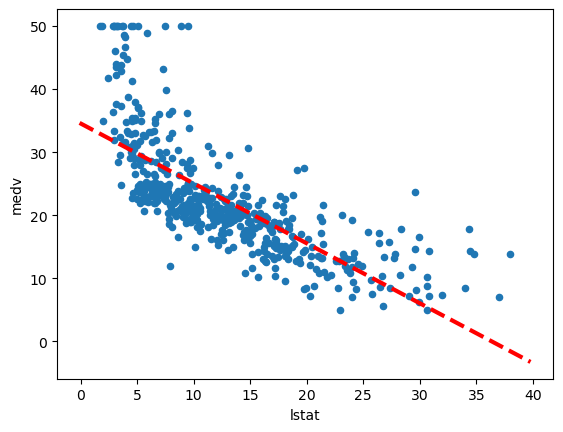

In [48]:
ax = Boston.plot.scatter('lstat', 'medv')
abline(ax,
results.params[0],
results.params[1],
'r--',
linewidth=3)

##### Thus, the final call to ax.plot() is ax.plot(xlim, ylim, 'r--', linewidth=3).We have used the argument 'r--' to produce a red dashed line, and added an argument to make it of width 3.

#### Next we examine some diagnostic plots, several of which were discussed in Section 3.3.3. We can find the fitted values and residuals of the fit as attributes of the results object. Various influence measures describing the regression model are computed with the get_influence() method. As wewill not use the fig component returned as the first value from subplots(), we simply capture the second returned value in ax below.

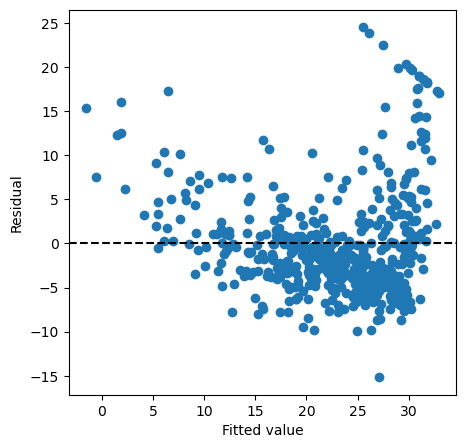

In [51]:
ax = subplots(figsize=(5,5))[1]
ax.scatter(results.fittedvalues , results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

#### Leverage statistics can be computed for any number of predictors using the hat_matrix_diag attribute of the value returned by the get_influence() method.

374

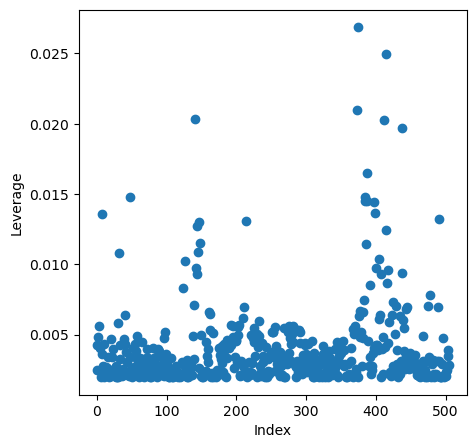

In [53]:
infl = results.get_influence()
ax = subplots(figsize=(5,5))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

# Multiple Linear Regression

#### In order to fit a multiple linear regression model using least squares, we again use the ModelSpec() transform to construct the required model matrix and response. The arguments to ModelSpec() can be quite general, but in this case a list of column names suffice. We consider a fit here with the two variables lstat and age.

In [108]:
X = MS(['lstat', 'age']).fit_transform(Boston)
model1 = sm.OLS(y, X)
results1 = model1.fit()
summarize(results1)
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Tue, 10 Feb 2026   Prob (F-statistic):           2.98e-88
Time:                        19:44:19   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     33.2228      0.731     45.458      0.000      31.787      34.659
lstat         -1.0321      0.048    -21.416      0.000      -1.127      -0.937
age            0.0345      0.012      2.826      0.005       0.011       0.059
==============================================================================
Omnibus:                      124.288   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.026
Skew:                           1.362   Prob(JB):                     1.02e-53
Kurtosis:                       5.038   Cond. No.                         201.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### The Boston data set contains 12 variables, and so it would be cumbersome to have to type all of these in order to perform a regression using all of the predictors. Instead, we can use the following short-hand:

In [110]:
terms = Boston.columns.drop('medv')

terms

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat'],
      dtype='object')

#### We can now fit the model with all the variables in terms using the same model matrix builder.

In [112]:
X = MS(terms).fit_transform(Boston)
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,41.6173,4.936,8.431,0.000
crim,-0.1214,0.033,-3.678,0.000
zn,0.0470,0.014,3.384,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8400,0.870,3.264,0.001
nox,-18.7580,3.851,-4.870,0.000
rm,3.6581,0.420,8.705,0.000
age,0.0036,0.013,0.271,0.787
dis,-1.4908,0.202,-7.394,0.000
rad,0.2894,0.067,4.325,0.000


#### What if we would like to perform a regression using all of the variables but one? For example, in the above regression output, age has a high p-value. So we may wish to run a regression excluding this predictor. The following syntax results in a regression using all predictors except age.

In [114]:
minus_age = Boston.columns.drop(['medv', 'age'])
Xma = MS(minus_age).fit_transform(Boston)
model1 = sm.OLS(y, Xma)
summarize(model1.fit())

,coef,std err,t,P>|t|
intercept,41.5251,4.920,8.441,0.000
crim,-0.1214,0.033,-3.683,0.000
zn,0.0465,0.014,3.379,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8528,0.868,3.287,0.001
nox,-18.4851,3.714,-4.978,0.000
rm,3.6811,0.411,8.951,0.000
dis,-1.5068,0.193,-7.825,0.000
rad,0.2879,0.067,4.322,0.000
tax,-0.0127,0.004,-3.333,0.001


## Multivariate Goodness of Fit
### List Comprehension
#### Often we encounter a sequence of objects which we would like to transform for some other task. Below, we compute the VIF for each feature in our X matrix and produce a data frame whose index agrees with the columns of X. The notion of list comprehension can often make such a task easier.124 3. Linear Regression List comprehensions are simple and powerful ways to form lists of Python objects. The language also supports dictionary and generator omprehension, though these are beyond our scope here. Let’s look at an example. We compute the VIF for each of the variables in the model matrix X, using the function variance_inflation_factor().

In [116]:
vals = [VIF(X, i)
for i in range(1, X.shape[1])]
vif = pd.DataFrame({'vif':vals},
    index=X.columns [1:])
vif

,vif
crim,1.767486
zn,2.298459
indus,3.987181
chas,1.071168
nox,4.369093
rm,1.912532
age,3.088232
dis,3.954037
rad,7.445301
tax,9.002158


### Interaction Terms
##### It is easy to include interaction terms in a linear model using ModelSpec(). Including a tuple ("lstat","age") tells the model matrix builder to include an interaction term between lstat and age. 
#### It captures whether the effect of lstat on the outcome changes depending on the value of age (and vice versa).

In [118]:
X = MS(['lstat',
'age',
('lstat', 'age')]).fit_transform(Boston)
model2 = sm.OLS(y, X)
summarize(model2.fit())

,coef,std err,t,P>|t|
intercept,36.0885,1.470,24.553,0.000
lstat,-1.3921,0.167,-8.313,0.000
age,-0.0007,0.020,-0.036,0.971
lstat:age,0.0042,0.002,2.244,0.025


### Non-linear Transformations of the Predictors
##### The model matrix builder can include terms beyond just column names and interactions. For instance, the poly() function supplied in ISLP specifies that columns representing polynomial functions of its first argument are added to the model matrix.

In [120]:
X = MS([poly('lstat', degree=2), 'age']).fit_transform(Boston)
model3 = sm.OLS(y, X)
results3 = model3.fit()
summarize(results3)

,coef,std err,t,P>|t|
intercept,17.7151,0.781,22.681,0.0
"poly(lstat, degree=2)[0]",-179.2279,6.733,-26.620,0.0
"poly(lstat, degree=2)[1]",72.9908,5.482,13.315,0.0
age,0.0703,0.011,6.471,0.0


#### The effectively zero p-value associated with the quadratic term (i.e. the third row above) suggests that it leads to an improved model. We use the anova_lm() function to further quantify the extent to which the quadratic fit is superior to the linear fit.

In [122]:
anova_lm(results1 , results3)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,503.0,19168.128609,0.0,NaN,NaN,NaN
1,502.0,14165.613251,1.0,5002.515357,177.278785,7.468491e-35


##### Here results1 represents the linear submodel containing predictors lstat and age, while results3 corresponds to the larger model above with a quadratic term in lstat. The anova_lm() function performs a hypothesis test comparing the two models. The null hypothesis is that the quadratic term in the bigger model is not needed, and the alternative hypothesis is that the bigger model is superior. Here the F-statistic is 177.28 and the associated p-value is zero. In this case the F-statistic is the square of the t-statistic for the quadratic term in the linear model summary for results3 — a consequence of the fact that these nested models differ by one degree of freedom. This provides very clear evidence that the quadratic polynomial in lstat improves the linear model. This is not surprising, since earlier we saw evidence for non-linearity in the relationship between medv and lstat.The function anova_lm() can take more than two nested models as input, in which case it compares every successive pair of models. That also explains why their are NaNs in the first row above, since there is no previous model with which to compare the first.

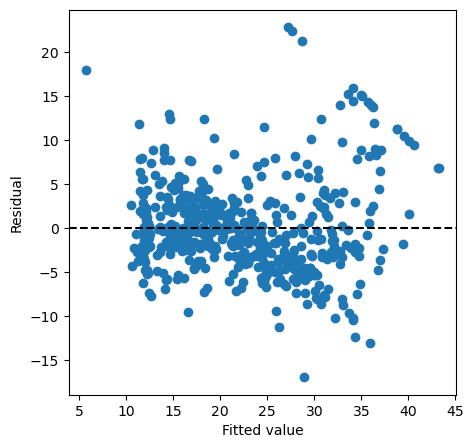

In [124]:
ax = subplots(figsize=(5,5)) [1]
ax.scatter(results3.fittedvalues , results3.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

### Qualitative Predictors
##### Here we use the Carseats data, which is included in the ISLP package. We will attempt to predict Sales (child car seat sales) in 400 locations based on a number of predictors

In [126]:
Carseats = load_data('Carseats')
Carseats.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

#### The predictor ShelveLoc takes on three possible values, Bad, Medium, and Good. Given a qualitative variable such as ShelveLoc, ModelSpec() generates dummy variables automatically. These variables are often referred to as a one-hot encoding of the categorical feature. Their columns sum to one, so to avoid collinearity with an intercept, the first column is dropped. Below we see the column ShelveLoc[Bad] has been dropped, since Bad is the first level of ShelveLoc. Below we fit a multiple regression model that includes some interaction terms

In [128]:
allvars = list(Carseats.columns.drop('Sales'))
y = Carseats['Sales']
final = allvars + [('Income', 'Advertising'),
('Price', 'Age')]
X = MS(final).fit_transform(Carseats)
model = sm.OLS(y, X)
summarize(model.fit())

,coef,std err,t,P>|t|
intercept,6.5756,1.009,6.519,0.000
CompPrice,0.0929,0.004,22.567,0.000
Income,0.0109,0.003,4.183,0.000
Advertising,0.0702,0.023,3.107,0.002
Population,0.0002,0.000,0.433,0.665
Price,-0.1008,0.007,-13.549,0.000
ShelveLoc[Good],4.8487,0.153,31.724,0.000
ShelveLoc[Medium],1.9533,0.126,15.531,0.000
Age,-0.0579,0.016,-3.633,0.000
Education,-0.0209,0.020,-1.063,0.288


#### Our model-matrix builder has created a ShelveLoc[Good] dummy variable that takes on a value of 1 if the shelving location is good, and 0 otherwise. It has also created a ShelveLoc[Medium] dummy variable that equals 1 if the shelving location is medium, and 0 otherwise. A bad shelving location corresponds to a zero for each of the two dummy variables. The fact that the coefficient for ShelveLoc[Good] in the regression output is positive indicates that a good shelving location is associated with high sales (relative to a bad location). And ShelveLoc[Medium] has a smaller positive coefficient, indicating that a medium shelving location leads to higher sales than a bad shelving location, but lower sales than a good shelving location.

### Exercises
#### Conceptual 
#### 1. Describe the null hypotheses to which the p-values given in Table 3.4 correspond. Explain what conclusions you can draw based on these p-values. Your explanation should be phrased in terms of sales, TV, radio, and newspaper, rather than in terms of the coefficients of the linear model

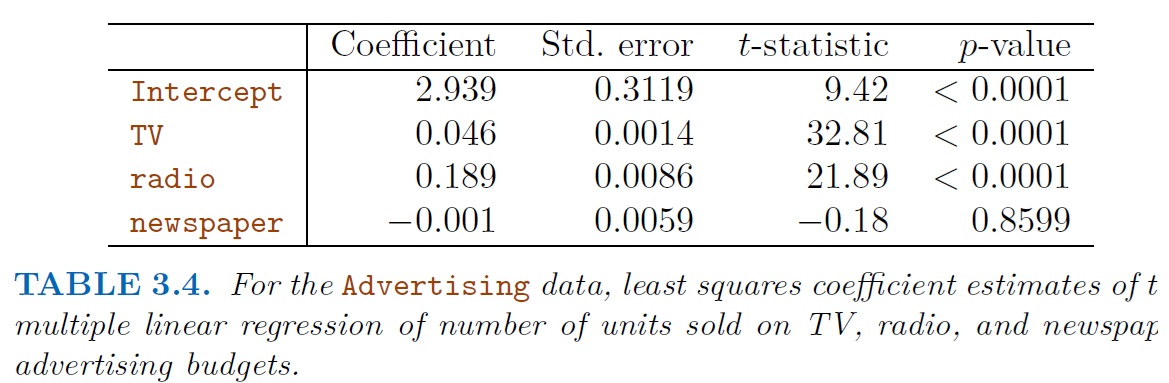

#### The p-value for each predictor (TV, radio, newspaper) tests the null hypothesis that there is no relationship between that specific advertising medium and the number of units sold, given the other advertising mediums are also in the model. For the intercept, the null hypothesis is that the average sales are zero when all advertising budgets are zero. The p-values in the table assess the relationship between advertising spending and unit sales, considering TV, radio, and newspaper. For the intercept, the near-zero p-value indicates that when all advertising budgets are zero, sales are significantly different from zero (around 2.9 units). The very low p-values for TV and radio suggest a strong positive relationship with sales, even after accounting for other advertising. A $1 increase in TV spending is associated with a 0.046 unit increase in sales, while a $1 increase in radio spending correlates with a 0.189 unit increase. Conversely, the high p-value for newspaper (0.8599) indicates no statistically significant relationship with sales when TV and radio advertising are considered. Therefore, TV and radio advertising appear to be effective drivers of sales, while the impact of newspaper advertising is not statistically supported by this model.  



#### 2. Carefully explain the differences between the KNN classifier and KNN regression methods

##### Both K-Nearest Neighbors (KNN) classifier and KNN regression predict a target value based on the values of its K nearest neighbors in the feature space. However, they differ in the type of target variable and the prediction method.   

##### KNN Classifier: The target variable is categorical. For a new data point, the KNN classifier identifies its K nearest neighbors and predicts the class that is most frequent among them (majority voting). The output is a discrete class label.   

##### KNN Regression: The target variable is continuous. For a new data point, KNN regression identifies its K nearest neighbors and predicts the target value as the average (or weighted average) of the target values of these neighbors. The output is a continuous numerical value.

##### In essence, classification predicts which group a data point belongs to, while regression predicts a specific numerical value. The core concept of finding the nearest neighbors remains the same, but the aggregation of their target values differs based on the nature of the prediction task.

#### 3. Suppose we have a data set with five predictors, X1 = GPA, X2 = IQ, X3 = Level (1 for College and 0 for High School), X4 = Interaction between GPA and IQ, and X5 = Interaction between GPA and Level. The response is starting salary after graduation (in thousands of dollars). Suppose we use least squares to fit the model, and get ˆ B0 = 50, ˆ B1 = 20, ˆ B2 = 0.07, ˆ B3 = 35, ˆ B4 = 0.01, ˆ B5 = −10.
#### (a) Which answer is correct, and why?
#### i. For a fixed value of IQ and GPA, high school graduates earn more, on average, than college graduates.


##### Substituting the given coefficient estimates and variable definitions:
##### Starting Salary=50+20⋅GPA+0.07⋅IQ+35⋅Level+0.01⋅(GPA×IQ)−10⋅(GPA×Level)

 ##### Here, Level=1 for College graduates and Level=0 for High School graduates.

##### We want to compare the starting salaries of high school and college graduates for fixed values of GPA and IQ.

##### For a High School graduate (Level = 0):
##### Starting Salary HS =50+20⋅GPA+0.07⋅IQ+35⋅(0)+0.01⋅(GPA×IQ)−10⋅(GPA×0)

##### Starting Salary HS=50+20⋅GPA+0.07⋅IQ+0.01⋅(GPA×IQ)

##### For a College graduate (Level = 1):
##### Starting Salary College =50+20⋅GPA+0.07⋅IQ+35⋅(1)+0.01⋅(GPA×IQ)−10⋅(GPA×1)

##### Starting Salary College =50+20⋅GPA+0.07⋅IQ+35+0.01⋅(GPA×IQ)−10⋅GPA

##### Starting Salary ollegeStarting Salary College =85+(20−10)⋅GPA+0.07⋅IQ+0.01⋅(GPA×IQ)

##### Starting Salary College =85+10⋅GPA+0.07⋅IQ+0.01⋅(GPA×IQ)

##### Now, let's compare Starting Salary 
##### Starting Salary HS −Starting Salary College  =(50+20⋅GPA+0.07⋅IQ+0.01⋅(GPA×IQ))−(85+10⋅GPA+0.07⋅IQ+0.01⋅(GPA×IQ))
##### Starting Salary HS −Starting Salary College =50+20⋅GPA+0.07⋅IQ+0.01⋅(GPA×IQ)−85−10⋅GPA−0.07⋅IQ−0.01⋅(GPA×IQ)
##### Starting Salary HS −Starting Salary College =(20⋅GPA−10⋅GPA)+(50−85)+(0.07⋅IQ−0.07⋅IQ)+(0.01⋅(GPA×IQ)−0.01⋅(GPA×IQ))
##### Starting Salary HS −Starting Salary College =10⋅GPA−35

##### For high school graduates to earn more on average than college graduates for a fixed GPA and IQ, we need:
##### Starting Salary HS >Starting Salary College
 
##### 10⋅GPA−35>0
##### 10⋅GPA>35
##### GPA>3.5

##### Statement (i) says that high school graduates earn more on average than college graduates for a fixed IQ and GPA. This is only true if GPA > 3.5. The statement does not specify the value of GPA. Therefore, statement (i) is not necessarily correct for all fixed values of IQ and GPA.

### Final Answer: The final answer is statement (i) is not necessarily correct for all fixed values of IQ and GPA.



#### ii. For a fixed value of IQ and GPA, college graduates earn more, on average, than high school graduates.

##### We found that the difference in starting salary between a high school graduate and a college graduate with the same GPA and IQ is:

##### Difference=Starting Salary HS −Starting Salary College =10⋅GPA−35

##### Statement (ii) says that college graduates earn more on average than high school graduates for a fixed IQ and GPA. This means:

##### Starting Salary College >Starting Salary HS
##### Which is equivalent to:Starting Salary HS −Starting Salary College <0

##### Substituting our derived difference:

##### 10⋅GPA−35<0

##### 10⋅GPA<35

##### GPA<3.5

##### So, college graduates earn more on average than high school graduates for a fixed IQ and GPA only when the GPA is less than 3.5.

##### Statement (ii) claims this is true for any fixed value of IQ and GPA. However, our calculation shows that the relationship depends on the value of GPA. If GPA is greater than 3.5, high school graduates earn more. If GPA is equal to 3.5, they earn the same.

##### Therefore, statement (ii) is not universally correct.

##### Final Answer: The final answer is statement (ii) is not universally correct.

#### iii. For a fixed value of IQ and GPA, high school graduates earn more, on average, than college graduates provided that the GPA is high enough.

#### For high school graduates to earn more on average than college graduates for a fixed GPA and IQ, we need:
##### Starting Salary HS >Starting Salary College
##### 10⋅GPA−35>0
##### 10⋅GPA>35
##### GPA>3.5
#### This result shows that high school graduates earn more on average than college graduates (for a fixed IQ and GPA) if and only if the GPA is greater than 3.5. Therefore, the statement that this occurs when the GPA is "high enough" is correct, and the threshold for "high enough" is a GPA greater than 3.5.

#### iv. For a fixed value of IQ and GPA, college graduates earn more, on average, than high school graduates provided thatthe GPA is high enough.

##### Statement (iv) says that college graduates earn more on average than high school graduates provided that the GPA is high enough. This means we are looking for a condition on GPA such that:

##### Starting Salary College >Starting Salary HS
##### Which is equivalent to:Starting Salary HS−Starting Salary College <0
##### Substituting our derived difference:
##### 10⋅GPA−35<0
##### Now, let's solve for GPA:
##### 10⋅GPA<35
##### GPA< 10/35
##### GPA<3.5
##### This result shows that college graduates earn more on average than high school graduates (for a fixed IQ and GPA) if and only if the GPA is less than 3.5. Therefore, the statement that this occurs when the GPA is "high enough" is false. It occurs when the GPA is low enough (specifically, less than 3.5).

#### (b) Predict the salary of a college graduate with IQ of 110 and a GPA of 4.0.

#### (c) True or false: Since the coefficient for the GPA/IQ interaction term is very small, there is very little evidence of an interaction effect. Justify your answer.

##### While the coefficient for the GPA/IQ interaction term (β4 =0.01) might appear small in absolute terms, its significance in the model is determined by its t-statistic (or equivalently, its p-value, which is not provided in the table). A small coefficient can still represent a statistically significant interaction effect if its standard error is also small.

##### The size of the coefficient alone does not indicate the strength of the evidence for an interaction. Since we are not given the standard error or the p-value associated with the GPA/IQ interaction term, we cannot conclude that there is very little evidence of an interaction effect based solely on the small magnitude of its coefficient. It is possible that the standard error is also sufficiently small, resulting in a significant t-statistic and strong evidence for an interaction.

##### Therefore, the statement is false. We need more information (like the standard error or p-value) to assess the statistical significance of the interaction term

#### 4. I collect a set of data (n = 100 observations) containing a single predictor and a quantitative response. I then fit a linear regression model to the data, as well as a separate cubic regression, i.e. Y =B0 + B1X + B2X2 + B3X3 + ".
#### (a) Suppose that the true relationship between X and Y is linear, i.e. Y = #0 + #1X + ". Consider the training residual sum of squares (RSS) for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.

#### (b) Answer (a) using test rather than training RSS.

#### (c) Suppose that the true relationship between X and Y is not linear, but we don’t know how far it is from linear. Consider the training RSS for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.

#### (d) Answer (c) using test rather than training RSS

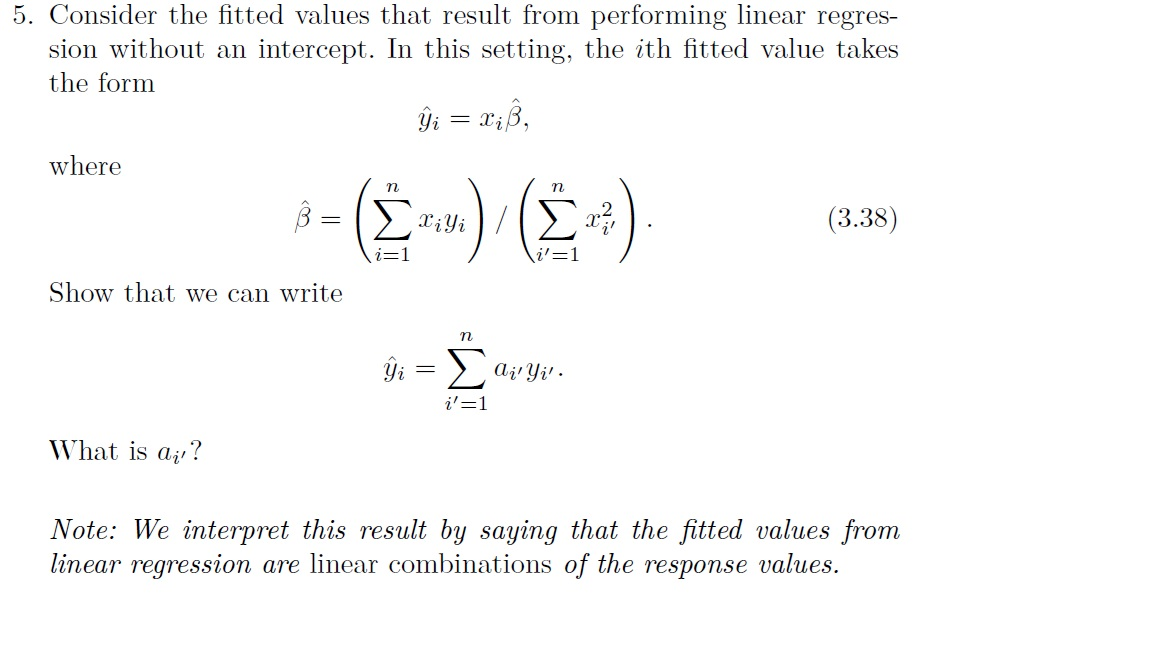

#### Solution:
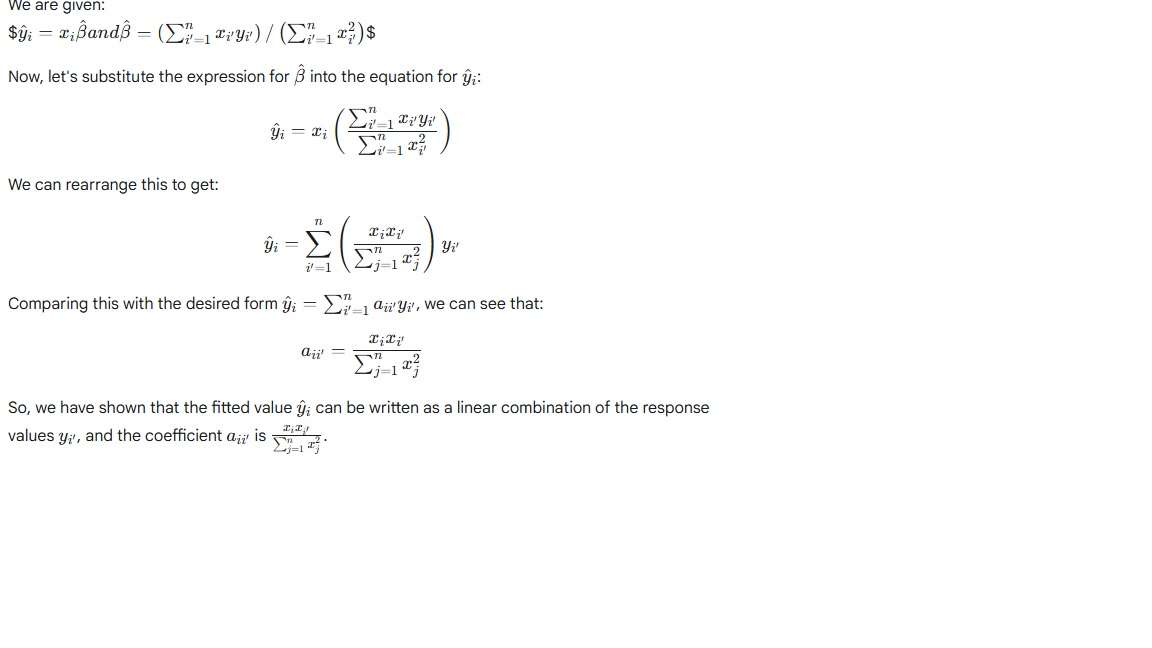

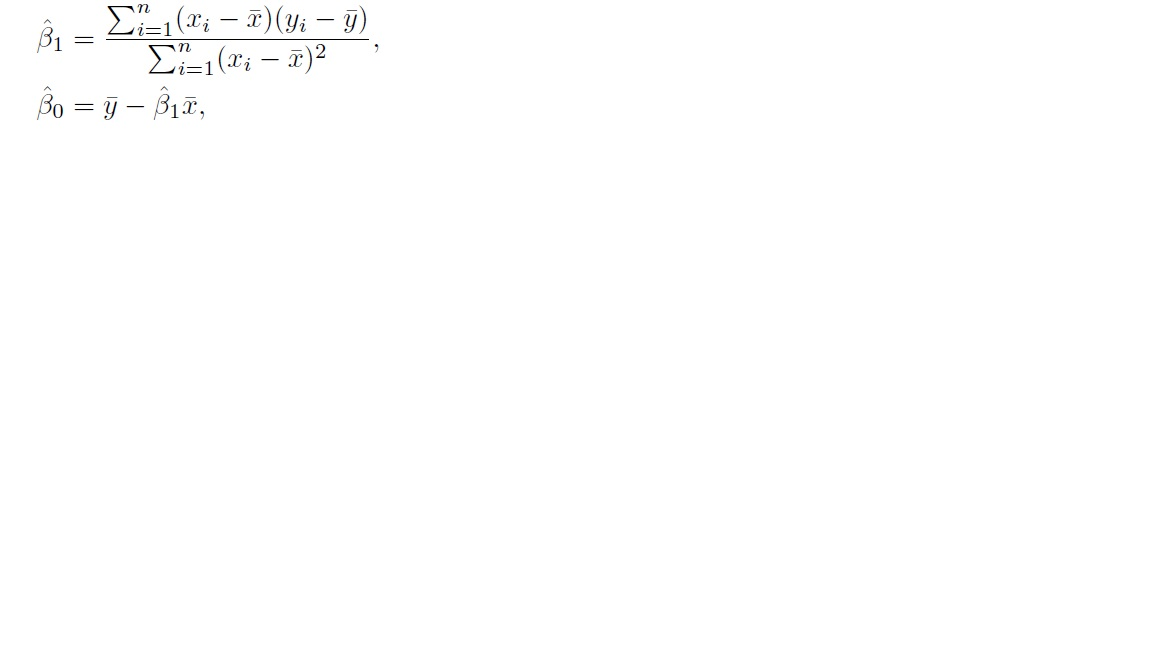
#### Argue that in the case of simple linear regression, the least squares line always passes through the point (¯x, ¯y).

#### Solution
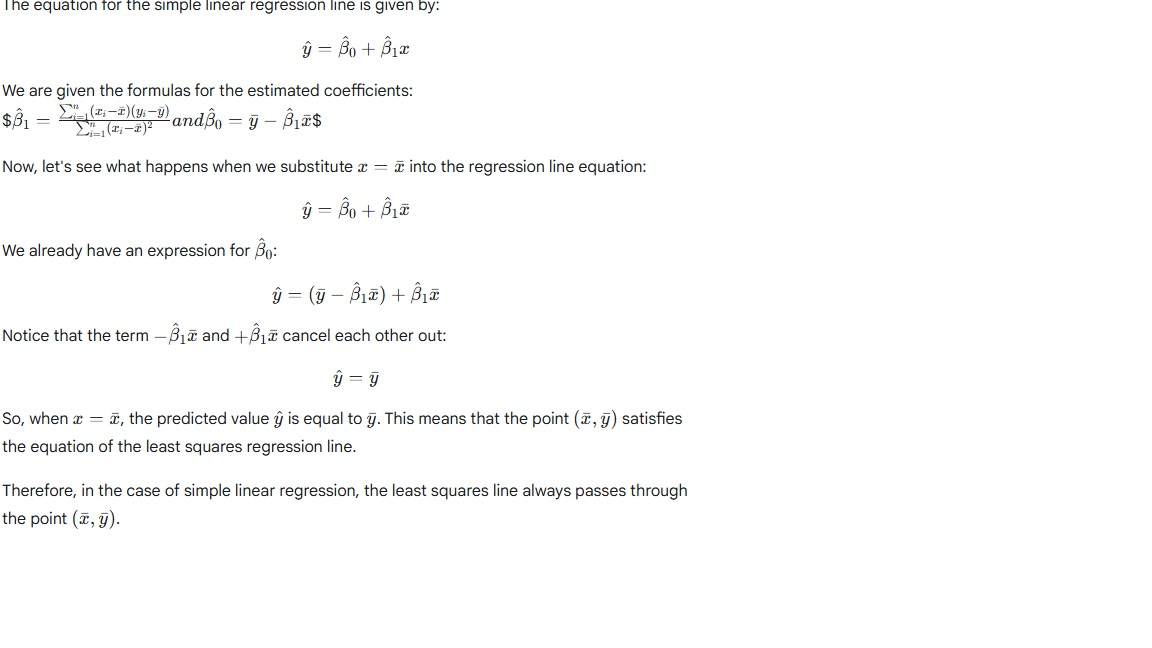

# Applied Questions.
#### 8. This question involves the use of simple linear regression on the Auto data set.

####  (a) Use the sm.OLS() function to perform a simple linear regression with mpg as the response and horsepower as the predictor. Use the summarize() function to print the results. Comment on the output. For example:
### i. Is there a relationship between the predictor and the response?

In [130]:
Auto=pd.read_csv('Auto.csv')

In [132]:
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [ ]:
Auto.columns

In [134]:
Auto = pd.read_csv("Auto.csv", na_values='?').dropna()
Auto['horsepower'] = pd.to_numeric(Auto['horsepower'])

# Define X and y
X = sm.add_constant(Auto['horsepower'])  # Add constant (intercept)
y = Auto['mpg']

# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Tue, 10 Feb 2026   Prob (F-statistic):           7.03e-81
Time:                        19:50:01   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

##### i. Relationship between predictor and response
##### Yes, there is a statistically significant relationship between horsepower and mpg:
##### Coefficient for horsepower: -0.1578
This means that for every unit increase in horsepower, the mpg decreases by about 0.16, on average.
##### p-value: 0.000 (very small)
This indicates that the relationship is highly significant.
##### R-squared: 0.606
About 60.6% of the variance in mpg can be explained by horsepower.

#### ii. How strong is the relationship between the predictor and the response?

#### The relationship is:
#### Statistically significant
#### Moderately strong, as indicated by the R² value of ~0.61
#### Negatively correlated, based on the negative coefficient

#### iii. Is the relationship between the predictor and the response positive or negative?

##### The relationship between the predictor and the response is negative as the coefficient of the predictor is negative.

#### iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals?

##### mpg(98) can be calculated as:
##### mpg=39.9359 - 0.1578(98)= 24.47 rounded off to 2 decimal places

In [136]:
new_data = pd.DataFrame({'const': [1], 'horsepower': [98]})

# Get predictions and intervals
prediction = model.get_prediction(new_data)
prediction_summary = prediction.summary_frame(alpha=0.05)

print(prediction_summary)

        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  24.467077  0.251262      23.973079      24.961075     14.809396   

   obs_ci_upper  
0     34.124758  


#### 95% Confidence Interval (for the mean mpg):
#### Lower bound: 23.97
#### Upper bound: 24.96
This means we are 95% confident that the average mpg for cars with 98 horsepower lies between 23.97 and 24.96.
#### 95% Prediction Interval (for an individual mpg):
#### Lower bound: 14.81
#### Upper bound: 34.12
This means a single car with 98 horsepower is likely to have an mpg between 14.81 and 34.12 — a much wider range due to individual variation.

#### (b) Plot the response and the predictor in a new set of axes ax. Use the ax.axline() method or the abline() function defined in the lab to display the least squares regression line.

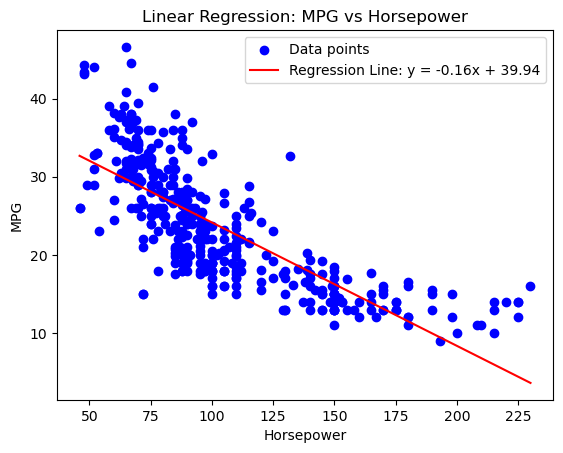

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Convert '?' to NaN, if the dataset has '?' as a placeholder for missing data
Auto.replace('?', np.nan, inplace=True)

# Convert 'horsepower' and 'mpg' to numeric, forcing errors to NaN
Auto['horsepower'] = pd.to_numeric(Auto['horsepower'], errors='coerce')
Auto['mpg'] = pd.to_numeric(Auto['mpg'], errors='coerce')

# Drop rows with NaN values in 'horsepower' and 'mpg'
Auto.dropna(subset=['horsepower', 'mpg'], inplace=True)

# Extract predictor (horsepower) and response (mpg)
X = Auto['horsepower'].values.reshape(-1, 1)  # Predictor (horsepower)
y = Auto['mpg'].values  # Response (mpg)

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the slope (coef_) and intercept (intercept_)
slope = model.coef_[0]
intercept = model.intercept_

# Create a new figure and axes
fig, ax = plt.subplots()

# Scatter plot of the predictor vs. response
ax.scatter(Auto['horsepower'], Auto['mpg'], color='blue', label='Data points')

# Calculate the y-values for the regression line (for example, the min and max of horsepower)
x_min = Auto['horsepower'].min()
x_max = Auto['horsepower'].max()
y_min = slope * x_min + intercept
y_max = slope * x_max + intercept

# Plot the regression line using ax.plot() instead of ax.axline()
ax.plot([x_min, x_max], [y_min, y_max], color='red', label=f'Regression Line: y = {slope:.2f}x + {intercept:.2f}')

# Labeling the axes
ax.set_xlabel('Horsepower')
ax.set_ylabel('MPG')

# Adding a title
ax.set_title('Linear Regression: MPG vs Horsepower')

# Adding a legend
ax.legend()

# Show the plot
plt.show()


#### (c) Produce some of diagnostic plots of the least squares regression fit as described in the lab. Comment on any problems you see with the fit.

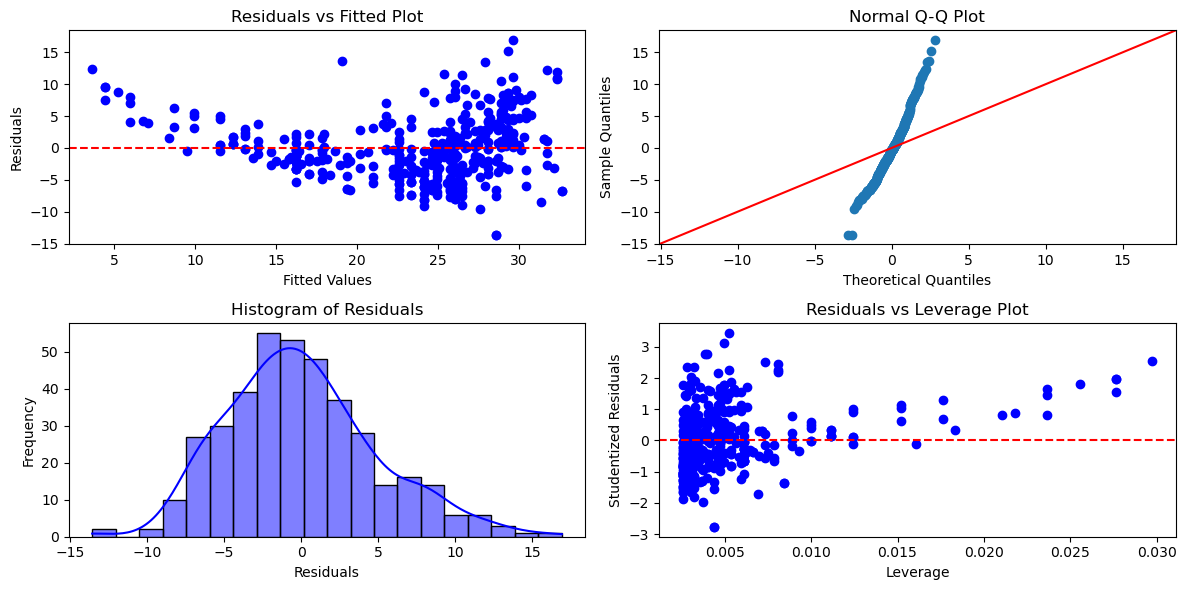

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns


# Get the predictions and residuals
y_pred = model.predict(X)
residuals = y - y_pred

# 1. Residuals vs Fitted Plot
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.scatter(y_pred, residuals, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Plot')

# 2. Q-Q Plot (Normality of Residuals)
plt.subplot(2, 2, 2)
sm.qqplot(residuals, line='45', ax=plt.gca())
plt.title('Normal Q-Q Plot')

# 3. Histogram of Residuals
plt.subplot(2, 2, 3)
sns.histplot(residuals, kde=True, color='blue', bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')

# 4. Residuals vs Leverage Plot
# Adding a constant for intercept term to X
X_with_intercept = sm.add_constant(X)
model_sm = sm.OLS(y, X_with_intercept).fit()
influence = model_sm.get_influence()
leverage = influence.hat_matrix_diag
studentized_residuals = influence.resid_studentized_internal

plt.subplot(2, 2, 4)
plt.scatter(leverage, studentized_residuals, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Leverage')
plt.ylabel('Studentized Residuals')
plt.title('Residuals vs Leverage Plot')

# Adjust layout
plt.tight_layout()
plt.show()


##### It looks like we have a few potential issues with the fit based on these diagnostic plots:

##### Non-constant Variance (Heteroscedasticity): The Residuals vs Fitted Plot shows a clear funnel shape. The spread of the residuals seems to increase as the fitted values increase. This violates the assumption of homoscedasticity (constant variance of errors), which is important for reliable inference in regression.

##### Non-Normality of Residuals: The Normal Q-Q Plot shows a noticeable deviation from the straight red line, especially in the tails. This suggests that the residuals might not be normally distributed. While regression models are somewhat robust to deviations from normality in large samples, significant departures can affect the validity of hypothesis tests and confidence intervals, especially in smaller samples. The Histogram of Residuals also appears somewhat skewed to the right, further supporting the potential issue of non-normality.

##### Potential Outliers or High Leverage Points: The Residuals vs Leverage Plot doesn't immediately scream out any highly influential outliers (points with high leverage and large studentized residuals). However, there are a few points with relatively high leverage (towards the right side of the plot) and moderate studentized residuals. These points might be worth investigating further to see if they are unduly influencing the regression model.

##### In summary, the most prominent issue appears to be the non-constant variance of the residuals. There are also indications of non-normality and potentially a few points with higher leverage that might warrant closer inspection. Addressing the heteroscedasticity is likely the most critical step to improve the model fit.

## 9. This question involves the use of multiple linear regression on the Auto data set.

#### (a) Produce a scatterplot matrix which includes all of the variables in the data set.

In [142]:
Auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

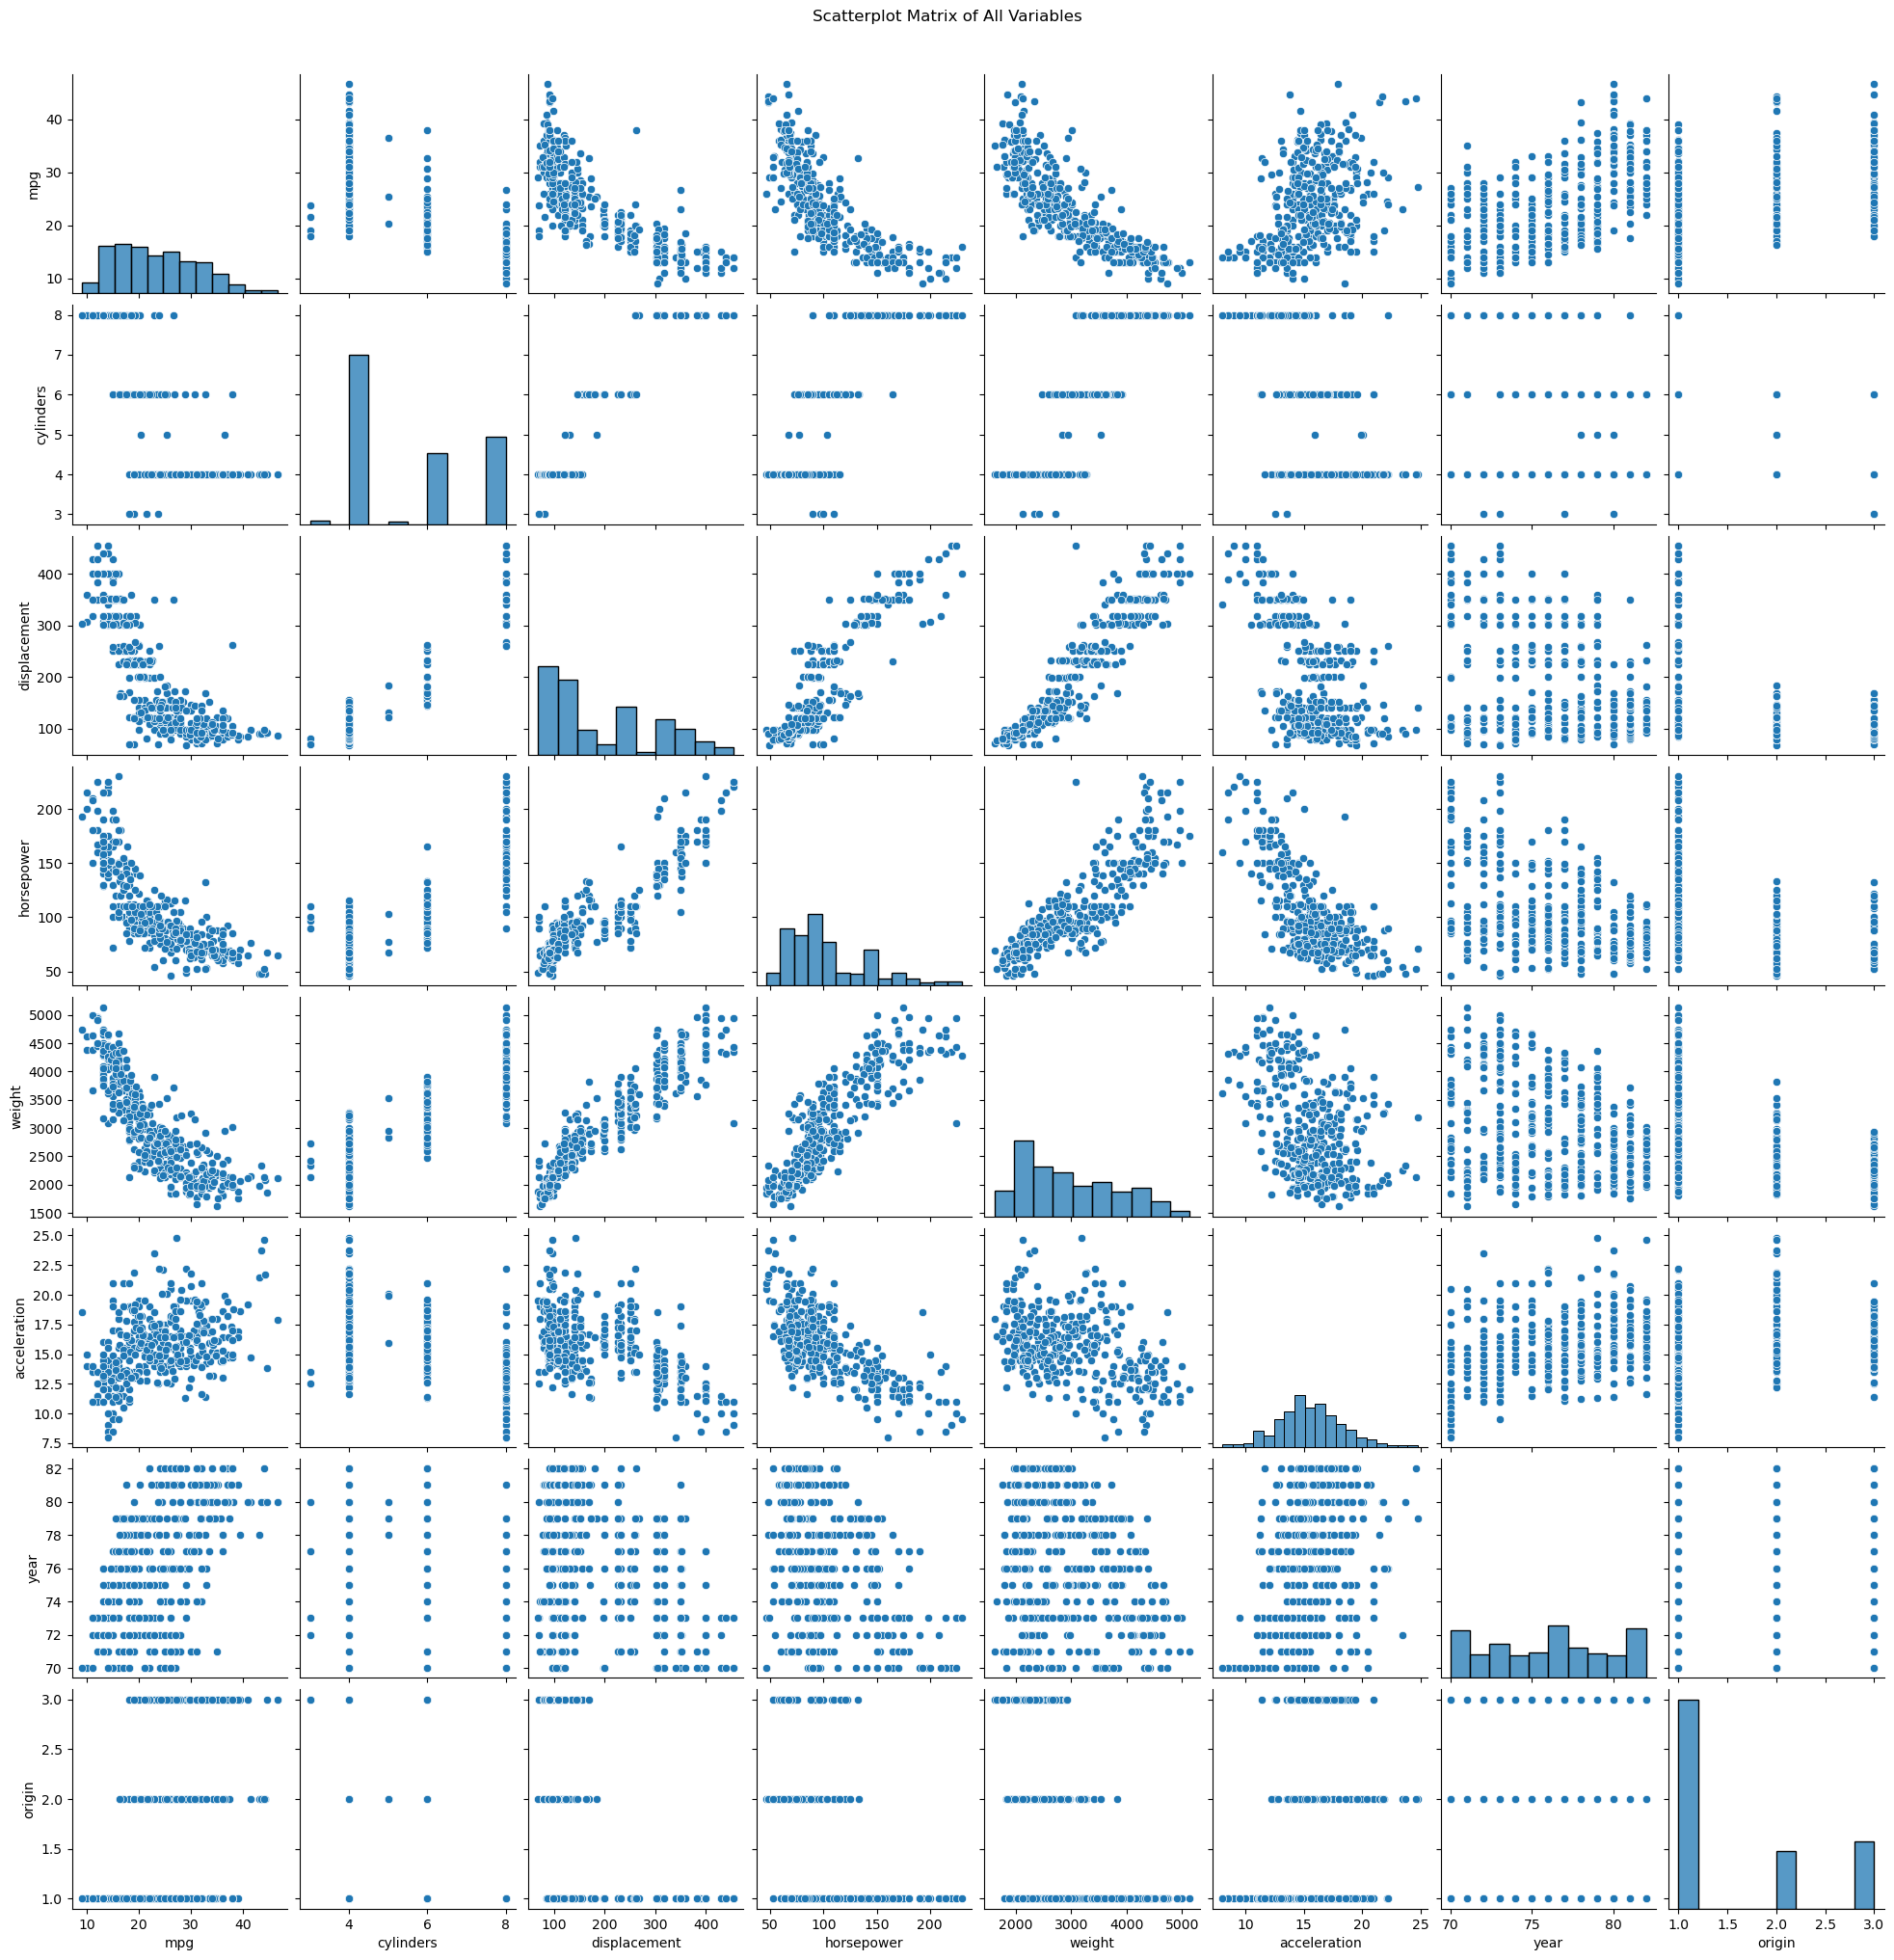

In [144]:
sns.pairplot(Auto)
plt.suptitle("Scatterplot Matrix of All Variables", y=1.02)
plt.show()

#### (b) Compute the matrix of correlations between the variables using the DataFrame.corr() method.

In [146]:
numeric_df = Auto.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

# Print the correlation matrix
print(correlation_matrix)

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
year          0.580541  -0.345647     -0.369855   -0.416361 -0.309120   
origin        0.565209  -0.568932     -0.614535   -0.455171 -0.585005   

              acceleration      year    origin  
mpg               0.423329  0.580541  0.565209  
cylinders        -0.504683 -0.345647 -0.568932  
displacement     -0.543800 -0.369855 -0.614535  
horsepower       -0.689196 -0.416361 -0.455171  
weight           -0.416839 -0.309120 -0.585005  
acceleration      1.000000  0.290316  0.212746  

### (c) Use the sm.OLS() function to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the summarize() function to print the results.Comment on the output. For instance:

#### i. Is there a relationship between the predictors and the response? Use the anova_lm() function from statsmodels to answer this question.

In [148]:


# Define the dependent variable (response) and independent variables (predictors)
y = Auto['mpg']
X = Auto.drop(columns=['mpg', 'name'])

# Add a constant (intercept) term to the predictors
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Tue, 10 Feb 2026   Prob (F-statistic):          2.04e-139
Time:                        19:52:30   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

In [150]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm

# Load and clean data
auto = pd.read_csv('Auto.csv')
auto['horsepower'] = pd.to_numeric(auto['horsepower'], errors='coerce')
auto.dropna(inplace=True)

# Define the response
y = auto['mpg']

# Full model predictors
X_full = auto.drop(columns=['mpg', 'name'])
X_full = sm.add_constant(X_full)
model_full = sm.OLS(y, X_full).fit()

# Reduced model: just the intercept
X_reduced = pd.DataFrame({'const': 1}, index=auto.index)  # Ensures matching indices
model_reduced = sm.OLS(y, X_reduced).fit()

# ANOVA comparison
anova_results = anova_lm(model_reduced, model_full)

# Print results
print(anova_results)


   df_resid           ssr  df_diff       ss_diff           F         Pr(>F)
0     391.0  23818.993469      0.0           NaN         NaN            NaN
1     384.0   4252.212530      7.0  19566.780939  252.428045  2.037106e-139


#### Interpretation:
The full model (Model 1) reduced the SSR drastically (from ~23819 → ~4252).

The F-statistic is very large (252.43), indicating that the model with predictors explains the variance in mpg much better than the intercept-only model.

The p-value is extremely small (2.0371e-139), which is essentially 0.

✅ Conclusion:
There is a statistically significant relationship between the predictors and the response variable mpg. The probability that this improvement in the model happened by chance is basically zero.

#### ii. Which predictors appear to have a statistically significant relationship to the response?

In [152]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Tue, 10 Feb 2026   Prob (F-statistic):          2.04e-139
Time:                        19:52:39   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

#### Predictor	Coefficient	p-value	Interpretation
#### displacement	0.0199	0.008	✅ Significant — positively related to mpg (surprisingly in this model)
#### weight	-0.0065	0.000	✅ Significant — negatively related to mpg
#### year	0.7508	0.000	✅ Significant — newer cars tend to have higher mpg
#### origin	1.4261	0.000	✅ Significant — cars of different origins differ significantly in mpg

#### iii. What does the coefficient for the year variable suggest?

###### The coefficient 0.7508 means that, holding all other variables constant, for each additional year, the mpg (miles per gallon) is expected to increase by approximately 0.75 units.

###### This suggests that newer cars are more fuel-efficient than older ones.This makes intuitive sense, as automotive technology has improved over time, with better engines, aerodynamics, and fuel efficiency standards.



#### (d) Produce some of diagnostic plots of the linear regression fit as described in the lab. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

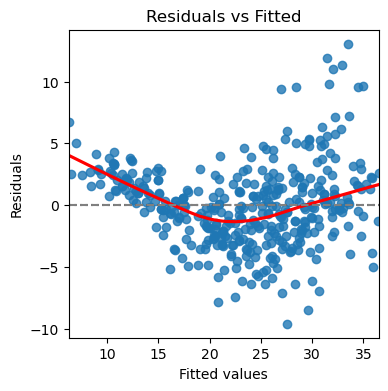

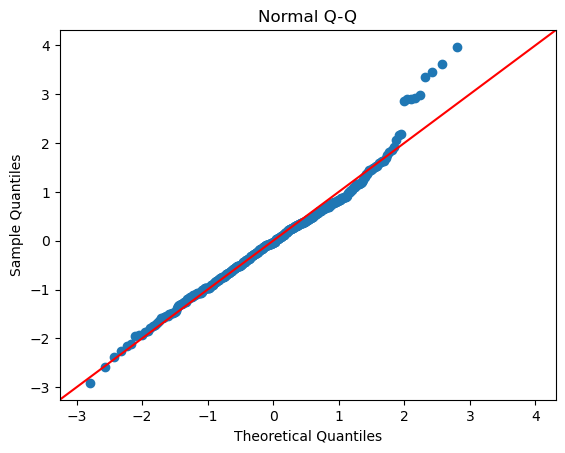

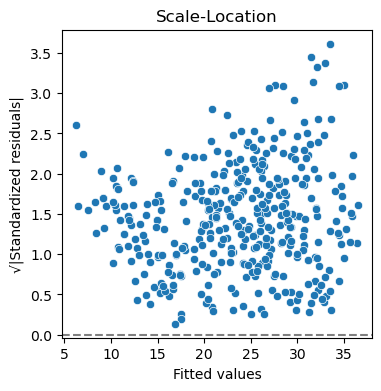

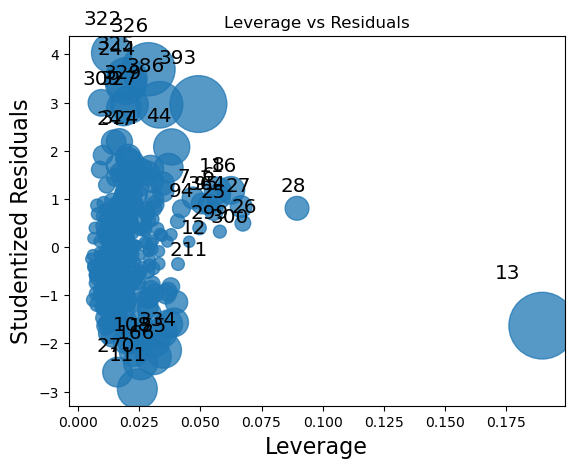

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Assume model_full is already fit from CP2
# If not, re-run the model_full fitting step here

# Get model residuals and fitted values
residuals = model_full.resid
fitted = model_full.fittedvalues

# 1. Residuals vs Fitted
plt.figure(figsize=(4,4))
sns.residplot(x=fitted, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.axhline(0, linestyle='--', color='gray')
plt.show()

# 2. QQ Plot
sm.qqplot(residuals, line='45', fit=True)
plt.title('Normal Q-Q')
plt.show()

# 3. Scale-Location plot (Spread vs Fitted)
plt.figure(figsize=(4,4))
sns.scatterplot(x=fitted, y=abs(residuals)**0.5)
plt.title('Scale-Location')
plt.xlabel('Fitted values')
plt.ylabel('√|Standardized residuals|')
plt.axhline(y=0, linestyle='--', color='gray')
plt.show()

# 4. Leverage plot
sm.graphics.influence_plot(model_full, criterion="cooks")
plt.title('Leverage vs Residuals')
plt.show()


#### Summary
#### 1. Residuals vs Fitted Plot
What we see: There's a distinct curve pattern in the residuals, rather than a random scatter around the zero line.
Interpretation: This suggests non-linearity in the data. The model might be missing some non-linear relationships between predictors and the response.
Recommendation: Consider polynomial or interaction terms to better capture complex relationships.

#### 2. Normal Q-Q Plot
What we see: Most points lie along the line, but the tails (especially upper tail) deviate.
Interpretation: Residuals mostly follow a normal distribution, but there are some outliers on the higher end.
Recommendation: These outliers may need further investigation. You could try robust regression or transformations.

#### 3. Scale-Location Plot (Spread-Location)
What we see: The variance of residuals increases slightly with fitted values.
Interpretation: This indicates heteroscedasticity (non-constant variance).
Recommendation: Try a transformation on the response variable (e.g., log) or use weighted least squares.

#### 4. Residuals vs Leverage Plot (Cook’s Distance)
What we see: Points 13 and 28 stand out with high leverage and large residuals.
Interpretation: These are influential observations, meaning they may disproportionately affect the model's fit.
Recommendation: Investigate these points individually. Consider whether they're data entry errors or valid extreme cases.

#### (f) Try a few different transformations of the variables, such as log(X), under root X, X squared.

In [156]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.datasets import get_rdataset

# Load the 'Auto' dataset from statsmodels
data = get_rdataset('Auto', 'ISLR').data
Auto = pd.DataFrame(data)

# Clean up missing values if any (replace '?' with NaN and drop)
Auto = Auto.replace('?', np.nan).dropna()

# Convert relevant columns to numeric
numeric_cols = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']
Auto[numeric_cols] = Auto[numeric_cols].apply(pd.to_numeric)

# Create transformed versions of the independent variables
Auto['log_cylinders'] = np.log(Auto['cylinders'])
Auto['log_displacement'] = np.log(Auto['displacement'])
Auto['log_horsepower'] = np.log(Auto['horsepower'])
Auto['log_weight'] = np.log(Auto['weight'])
Auto['log_acceleration'] = np.log(Auto['acceleration'])
Auto['log_year'] = np.log(Auto['year']) # Be cautious with year transformation

Auto['sqrt_cylinders'] = np.sqrt(Auto['cylinders'])
Auto['sqrt_displacement'] = np.sqrt(Auto['displacement'])
Auto['sqrt_horsepower'] = np.sqrt(Auto['horsepower'])
Auto['sqrt_weight'] = np.sqrt(Auto['weight'])
Auto['sqrt_acceleration'] = np.sqrt(Auto['acceleration'])
Auto['sqrt_year'] = np.sqrt(Auto['year']) # Be cautious with year transformation

Auto['sq_cylinders'] = Auto['cylinders']**2
Auto['sq_displacement'] = Auto['displacement']**2
Auto['sq_horsepower'] = Auto['horsepower']**2
Auto['sq_weight'] = Auto['weight']**2
Auto['sq_acceleration'] = Auto['acceleration']**2
Auto['sq_year'] = Auto['year']**2

# Add a constant term for the intercept
Auto['const'] = 1

# --- Model 1: Log-transformed independent variables ---
formula_log_vars = ['log_cylinders', 'log_displacement', 'log_horsepower', 'log_weight', 'log_acceleration', 'log_year']
X_log = Auto[formula_log_vars + ['const']]
y = Auto['mpg']
model_log = sm.OLS(y, X_log).fit()
print("\n--- Results with Log-transformed Independent Variables ---")
print(model_log.summary())

# --- Model 2: Square root-transformed independent variables ---
formula_sqrt_vars = ['sqrt_cylinders', 'sqrt_displacement', 'sqrt_horsepower', 'sqrt_weight', 'sqrt_acceleration', 'sqrt_year']
X_sqrt = Auto[formula_sqrt_vars + ['const']]
model_sqrt = sm.OLS(y, X_sqrt).fit()
print("\n--- Results with Square Root-transformed Independent Variables ---")
print(model_sqrt.summary())

# --- Model 3: Squared independent variables ---
formula_sq_vars = ['sq_cylinders', 'sq_displacement', 'sq_horsepower', 'sq_weight', 'sq_acceleration', 'sq_year']
X_sq = Auto[formula_sq_vars + ['const']]
model_sq = sm.OLS(y, X_sq).fit()
print("\n--- Results with Squared Independent Variables ---")
print(model_sq.summary())

# --- Model 4: Mixed transformations (example) ---
formula_mixed_vars = ['log_displacement', 'sqrt_weight', 'sq_horsepower', 'cylinders', 'acceleration', 'year']
X_mixed = Auto[formula_mixed_vars + ['const']]
model_mixed = sm.OLS(y, X_mixed).fit()
print("\n--- Results with Mixed Transformations (Example) ---")
print(model_mixed.summary())




--- Results with Log-transformed Independent Variables ---
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     348.1
Date:                Tue, 10 Feb 2026   Prob (F-statistic):          4.06e-152
Time:                        19:52:58   Log-Likelihood:                -996.58
No. Observations:                 392   AIC:                             2007.
Df Residuals:                     385   BIC:                             2035.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

### Interpretation
#### Model 1: Log-transformed Independent Variables

R-squared (0.844) and Adj. R-squared (0.842): This model shows an improvement in the explained variance compared to the original model (R-squared of 0.821). This suggests that logarithmic transformations might better capture the relationships between the predictors and mpg.
F-statistic (348.1) and Prob (F-statistic) (4.06e-152): The overall model remains highly statistically significant.
Individual Coefficients:
log_displacement, log_horsepower, and log_weight have statistically significant negative effects on mpg.
log_acceleration has a statistically significant negative effect, which might seem counterintuitive. It's possible that acceleration has a non-linear relationship with fuel efficiency, or it could be influenced by other factors in the model.
log_year has a highly significant positive effect, indicating that fuel efficiency has generally increased over the log of the years.
log_cylinders is not statistically significant at the 0.05 level (p=0.092).
Omnibus (48.928) and Prob(Omnibus) (0.000), Jarque-Bera (99.706) and Prob(JB) (2.23e-22): The tests for normality of residuals still strongly suggest non-normality. The skew and kurtosis values also indicate a departure from a normal distribution.
Durbin-Watson (1.371): There's still evidence of positive autocorrelation in the residuals.
Cond. No. (1.36e+03): The condition number has decreased significantly compared to the original model (8.59e+04), but it's still considered large, indicating potential multicollinearity.

#### Model 2: Square Root-transformed Independent Variables

R-squared (0.826) and Adj. R-squared (0.823): The explained variance is slightly higher than the original model but lower than the log-transformed model.
F-statistic (304.7) and Prob (F-statistic) (7.84e-143): The overall model is still highly significant.
Individual Coefficients:
sqrt_weight has a highly significant negative effect.
sqrt_year has a highly significant positive effect.
sqrt_horsepower has a p-value close to 0.05 (0.085), suggesting borderline significance.
sqrt_cylinders, sqrt_displacement, and sqrt_acceleration are not statistically significant.
Omnibus (49.924) and Prob(Omnibus) (0.000), Jarque-Bera (93.140) and Prob(JB) (5.95e-21): Non-normality of residuals remains a strong issue.
Durbin-Watson (1.266): Positive autocorrelation in the residuals is still present.
Cond. No. (3.28e+03): The condition number has decreased but is still large, indicating potential multicollinearity.

#### Model 3: Squared Independent Variables

R-squared (0.779) and Adj. R-squared (0.776): The explained variance has decreased compared to the original and the other transformed models. This suggests that a simple quadratic relationship might not be the best way to model these variables' effects on mpg.
F-statistic (226.6) and Prob (F-statistic) (5.42e-123): The overall model is still statistically significant.
Individual Coefficients:
sq_cylinders, sq_displacement, sq_weight, and sq_year have statistically significant effects.
sq_acceleration is significant at the 0.05 level.
sq_horsepower is not statistically significant.
Omnibus (22.196) and Prob(Omnibus) (0.000), Jarque-Bera (28.026) and Prob(JB) (8.21e-07): Non-normality of residuals is still indicated.
Durbin-Watson (1.217): Positive autocorrelation persists.
Cond. No. (1.44e+08): The condition number has increased dramatically, strongly suggesting severe multicollinearity issues in this model. Squaring variables can often exacerbate multicollinearity.

#### Model 4: Mixed Transformations (Example)

R-squared (0.836) and Adj. R-squared (0.833): The explained variance is high, better than the original and the square root model, but slightly lower than the log-transformed model.
F-statistic (326.6) and Prob (F-statistic) (1.21e-147): The overall model is highly significant.
Individual Coefficients:
log_displacement, sqrt_weight, sq_horsepower, cylinders, acceleration, and year all have statistically significant effects. The signs of the coefficients seem more intuitive for cylinders and acceleration in this mixed model.
Omnibus (37.658) and Prob(Omnibus) (0.000), Jarque-Bera (74.082) and Prob(JB) (8.19e-17): Non-normality of residuals is still present.
Durbin-Watson (1.307): Positive autocorrelation is still indicated.
Cond. No. (5.27e+05): The condition number remains very high, suggesting significant multicollinearity.

#### Overall Observations and Recommendations:

Improved R-squared with Log Transformations: The model with log-transformed independent variables achieved the highest R-squared, suggesting it provides the best fit among the tested transformations.

Persistent Non-Normality and Autocorrelation: Despite the transformations, the issues of non-normality and positive autocorrelation in the residuals persist across all models. These violations of OLS assumptions can affect the reliability of the p-values and the efficiency of the coefficient estimates. Further investigation and potential remedies (e.g., different modeling techniques, adding lagged variables if time series is relevant) might be needed.

Multicollinearity Concerns: While the log and square root transformations reduced the condition number compared to the original model and the squared model, multicollinearity remains a concern, especially in the mixed transformation model. It's important to be cautious when interpreting individual coefficients, as their standard errors might be inflated, and their signs or magnitudes could be affected by the correlations among the predictors.

Impact of Transformations on Individual Predictors: The statistical significance and the sign of the coefficients for individual predictors changed with the transformations. This highlights the importance of considering the functional form of the relationship between the predictors and the dependent variable.

In conclusion, the log-transformed model appears to be the most promising in terms of explained variance, but the underlying issues of non-normality, autocorrelation, and multicollinearity need to be addressed for more reliable and interpretable results.

## 10. This question should be answered using the Carseats data set.



In [158]:
car=pd.read_csv('Carseats.csv')

In [160]:
car.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [162]:
car.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [164]:
car.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [166]:
car.isnull().sum()


Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [168]:
# Example: if 'Urban' or 'US' are categorical

car['US'].value_counts()


US
Yes    258
No     142
Name: count, dtype: int64

In [170]:
car['Urban'].value_counts()

Urban
Yes    282
No     118
Name: count, dtype: int64

In [172]:
type(car['US'])

pandas.core.series.Series

#### (a) Fit a multiple regression model to predict Sales using Price, Urban, and US.

In [174]:

# One-hot encoding the categorical variables
df_encoded = pd.get_dummies(car, columns=['Urban', 'US'], drop_first=True)
print(df_encoded)

     Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education  Urban_Yes  US_Yes  
0  

#### (a) Fit a multiple regression model to predict Sales using Price,Urban, and US.

In [184]:
import statsmodels.formula.api as smf

# Fit the multiple regression model treating Urban and US as categorical
formula = 'Sales ~ Price + C(Urban) + C(US)'
model = smf.ols(formula, data=car).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Tue, 10 Feb 2026   Prob (F-statistic):           2.39e-23
Time:                        19:56:16   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          13.0435      0.651     

#### (b) Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!

#### Intercept (13.0435):

This is the estimated value of 'Sales' when all the predictor variables are at their baseline levels.
##### For the categorical variables:
'Urban' has two levels, and since C(Urban)[T.Yes] is listed, the baseline level for 'Urban' is 'No'.
'US' also has two levels, and since C(US)[T.Yes] is listed, the baseline level for 'US' is 'No'.
Therefore, the intercept of 13.0435 represents the predicted average 'Sales' for stores that are not located in an urban area ('Urban' = 'No') and are not located in the US ('US' = 'No'), when the 'Price' is 0 (which is not a realistic value in this context, so the intercept should be interpreted cautiously as the starting point of the model).
C(Urban)[T.Yes] (-0.0219):

This is the estimated difference in average 'Sales' between stores located in an urban area ('Urban' = 'Yes') and stores not located in an urban area ('Urban' = 'No'), holding 'Price' and 'US' constant.
The coefficient of -0.0219 suggests that, on average, stores in urban areas have slightly lower 'Sales' compared to stores not in urban areas, by approximately 0.0219 units.
The p-value of 0.936 is very high (much greater than the typical significance level of 0.05), indicating that this difference is not statistically significant. We cannot conclude that there is a real difference in 'Sales' based on whether a store is in an urban area or not, after accounting for 'Price' and whether it's in the US.
C(US)[T.Yes] (1.2006):

This is the estimated difference in average 'Sales' between stores located in the US ('US' = 'Yes') and stores not located in the US ('US' = 'No'), holding 'Price' and 'Urban' constant.
The coefficient of 1.2006 suggests that, on average, stores located in the US have significantly higher 'Sales' compared to stores not in the US, by approximately 1.2006 units.
The p-value of 0.000 is very low (less than 0.05), indicating that this difference is highly statistically significant. We can confidently conclude that there is a real and positive difference in 'Sales' for stores located in the US, after accounting for 'Price' and urban location.
Price (-0.0545):

This is the estimated change in average 'Sales' for a one-unit increase in 'Price', holding 'Urban' and 'US' constant.
The coefficient of -0.0545 suggests that, on average, for every one-unit increase in price, 'Sales' are expected to decrease by approximately 0.0545 units.
The p-value of 0.000 is very low (less than 0.05), indicating that this negative relationship between 'Price' and 'Sales' is highly statistically significant. We can confidently conclude that as the price increases, the sales tend to decrease, after accounting for urban location and whether the store is in the US.
##### In Summary:

The model suggests that being located in the US has a strong positive impact on 'Sales'.
The price of the product has a strong negative impact on 'Sales'.
Whether a store is located in an urban area or not does not appear to have a statistically significant impact on 'Sales' after accounting for price and US location.
The baseline 'Sales' (for a non-urban, non-US store with a price of 0) is estimated to be around 13.04 units, although the zero price scenario is not practically meaningful.

#### (c) Write out the model in equation form, being careful to handle the qualitative variables properly.

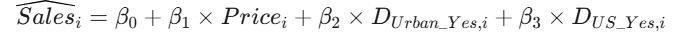

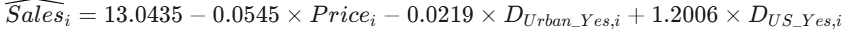

#### (d) For which of the predictors can you reject the null hypothesis H0 : Bj = 0?

We can reject the null hypothesis H0:βj =0 for the following predictors:

Intercept, C(US)[T.Yes] (indicating 'US' is a significant predictor) and Price
For the predictor C(Urban)[T.Yes] (indicating 'Urban'), we fail to reject the null hypothesis, suggesting it is not a statistically significant predictor in this model.

#### (e) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

In [186]:


# Fit the smaller multiple regression model using Price and US to predict Sales
formula_smaller = 'Sales ~ Price + C(US)'
model_smaller = smf.ols(formula_smaller, data=car).fit()

# Print the summary of the smaller model
print(model_smaller.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Tue, 10 Feb 2026   Prob (F-statistic):           2.66e-24
Time:                        19:56:27   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0308      0.631     20.652   

#### (f) How well do the models in (a) and (e) fit the data?

R-squared: Both models have the exact same R-squared value of 0.239. This means that both models explain the same proportion (23.9%) of the variance in 'Sales'.

Adjusted R-squared: The Adjusted R-squared for Model 2 (0.235) is slightly higher than the Adjusted R-squared for Model 1 (0.234). The Adjusted R-squared penalizes the inclusion of unnecessary predictors. Since Model 2 achieves a slightly better Adjusted R-squared with one fewer predictor ('Urban'), it suggests that 'Urban' did not add much explanatory power to the model. The slight increase in Adjusted R-squared in Model 2 indicates a slightly better fit when considering the model's complexity.
Conclusion on Model Fit:

Based on these metrics, Model 2 (the smaller model with only 'Price' and 'US') fits the data slightly better than Model 1 (which also includes 'Urban') when considering the principle of parsimony.

While both models explain the same amount of variance in 'Sales' (as indicated by the R-squared), Model 2 achieves this with fewer predictors, resulting in a slightly higher Adjusted R-squared. This suggests that 'Urban' was not a significant contributor to explaining the variance in 'Sales' in the presence of 'Price' and 'US'. Therefore, the simpler model (Model 2) is preferable as it provides a comparable fit with fewer variables.

#### (g) Using the model from (e), obtain 95 % confidence intervals for the coefficient(s).

In [188]:
# Obtain 95% confidence intervals for the coefficients
confidence_intervals = model_smaller.conf_int(alpha=0.05)

# Print the confidence intervals
print("95% Confidence Intervals for the Coefficients (Model 2):")
print(confidence_intervals)

95% Confidence Intervals for the Coefficients (Model 2):
                     0          1
Intercept     11.79032  14.271265
C(US)[T.Yes]   0.69152   1.707766
Price         -0.06476  -0.044195


#### (h) Is there evidence of outliers or high leverage observations in the model from (e)?


Observations with Externally Studentized Residuals > |2| (Potential Outliers):
     Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
17   12.29        147      74           13         251    131      Good   52   
25   14.90        139      32            0         176     82      Good   54   
28    2.99        103      74            0         359     97       Bad   55   
30   13.55        125      94            0         447     89      Good   30   
49   10.61        157      93            0          51    149      Good   32   
50    1.42         99      32           18         341    108       Bad   80   
57    0.91         93      91            0          22    117       Bad   75   
62    1.82        139      45            0         146    133       Bad   77   
68   13.39        149      69           20         366    134      Good   60   
82   11.62        151      83            4         325    139      Good   28   
98   12.49        122      77           

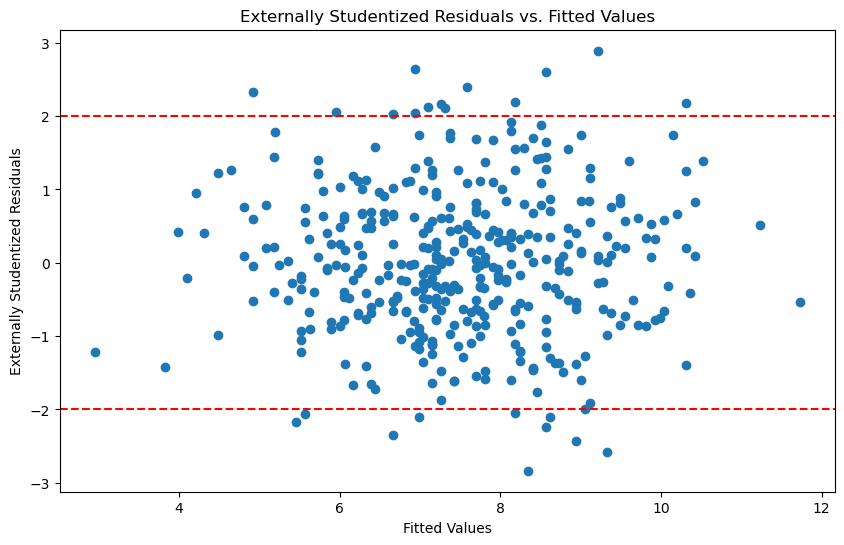

In [190]:
# --- Identify Outliers (using externally studentized residuals) ---
influence = model_smaller.get_influence()
standardized_residuals = influence.resid_studentized_external

# Rule of thumb: Externally studentized residuals > |2| or |3| might be outliers
outlier_threshold = 2
outliers = car[np.abs(standardized_residuals) > outlier_threshold]
print(f"\nObservations with Externally Studentized Residuals > |{outlier_threshold}| (Potential Outliers):\n{outliers}")

plt.figure(figsize=(10, 6))
plt.scatter(model_smaller.fittedvalues, standardized_residuals)
plt.axhline(y=outlier_threshold, color='r', linestyle='--')
plt.axhline(y=-outlier_threshold, color='r', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Externally Studentized Residuals")
plt.title("Externally Studentized Residuals vs. Fitted Values")
plt.show()

The table shows 23 observations that have residuals more than 2 standard deviations away from the regression line of Model 2 (Sales ~ Price + C(US)). This suggests that the model does not predict the 'Sales' for these particular stores as well as it does for the majority of the data. 

##### What this implies:

##### Model Limitations: Model 2, which only considers 'Price' and whether the store is in the 'US', may not be capturing all the factors that influence 'Sales' for these specific observations. Other variables not included in the model (like 'Advertising', 'ShelveLoc', 'CompPrice', etc.) might be playing a more significant role for these stores.
##### Potential Data Issues: While these are flagged as potential outliers by a statistical rule of thumb, it's important to remember they might not be errors in the data. They could represent genuinely unusual stores or market conditions.

Based on the externally studentized residuals, there is evidence of several potential outliers in Model 2. These are observations where the model's prediction of 'Sales' differs substantially from the actual 'Sales' values. You might want to consider whether these outliers have a significant impact on the overall model and if further investigation is warranted.

##### In summary, the plot confirms the presence of potential outliers in Model 2. These are the points that fall outside the +/- 2 range for the externally studentized residuals. While most of the data is reasonably well-explained by the model, these outliers represent instances where the model's predictions deviate substantially from the observed 'Sales' values. The relatively random scatter of the residuals within the threshold suggests that the model's assumptions might not be severely violated, apart from the presence of these outliers.

### 11. In this problem we will investigate the t-statistic for the null hypothesis H0 : B = 0 in simple linear regression without an intercept. To begin, we generate a predictor x and a response y as follows.

In [192]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = 2 * x + rng.normal(size=100)


#### (a) Perform a simple linear regression of y onto x, without an intercept. Report the coefficient estimate ˆ #, the standard error of this coefficient estimate, and the t-statistic and p-value associated with the null hypothesis H0 : # = 0. Comment on these results. (You can perform regression without an intercept using the keywords argument intercept=False to ModelSpec().)

In [194]:
import pandas as pd
import statsmodels.api as sm
import numpy as np


model = sm.OLS(y, x).fit()

# Report the results
print(model.summary())

# Extract specific results
beta_hat = model.params[0]
stderr_beta = model.bse[0]
t_statistic = model.tvalues[0]
p_value = model.pvalues[0]

print(f"\nCoefficient Estimate (Betâ): {beta_hat:.4f}")
print(f"Standard Error of Betâ: {stderr_beta:.4f}")
print(f"t-statistic: {t_statistic:.4f}")
print(f"p-value: {p_value:.4f}")

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Tue, 10 Feb 2026   Prob (F-statistic):                    6.23e-31
Time:                        19:57:01   Log-Likelihood:                         -141.35
No. Observations:                 100   AIC:                                      284.7
Df Residuals:                      99   BIC:                                      287.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

##### Summary of the Results:

The simple linear regression of y onto x without an intercept yields a coefficient estimate (β^) of 1.9762, with a standard error of 0.1169. The associated t-statistic is 16.8984, and the p-value is essentially 0.0000.

These results provide strong statistical evidence for a highly significant positive linear relationship between y and x when the regression line is constrained to pass through the origin.

The positive coefficient of 1.9762 indicates that for each unit increase in x, y is predicted to increase by approximately 1.98 units.
The small standard error of 0.1169 suggests that this coefficient estimate is relatively precise.
The large t-statistic of 16.8984 signifies that the estimated coefficient is far from zero in terms of its standard error.
The p-value of 0.0000 is well below any conventional significance level (e.g., 0.05), leading to a strong rejection of the null hypothesis (H0 :β=0). We can conclude that the slope of the line relating y to x (when forced through the origin) is significantly different from zero.
In essence, when the model is forced to go through the point (0,0), there is a strong and positive linear association between x and y.

#### (b) Now perform a simple linear regression of x onto y without an intercept, and report the coefficient estimate, its standard error,and the corresponding t-statistic and p-values associated with the null hypothesis H0 : # = 0. Comment on these results.

In [196]:
model = sm.OLS(x, y).fit()

# Report the results
print(model.summary())

# Extract specific results
beta_hat = model.params[0]
stderr_beta = model.bse[0]
t_statistic = model.tvalues[0]
p_value = model.pvalues[0]

print(f"\nCoefficient Estimate (Betâ): {beta_hat:.4f}")
print(f"Standard Error of Betâ: {stderr_beta:.4f}")
print(f"t-statistic: {t_statistic:.4f}")
print(f"p-value: {p_value:.4f}")

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Tue, 10 Feb 2026   Prob (F-statistic):                    6.23e-31
Time:                        19:57:04   Log-Likelihood:                         -58.349
No. Observations:                 100   AIC:                                      118.7
Df Residuals:                      99   BIC:                                      121.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

simple linear regression of x onto y without an intercept:

Coefficient Estimate (â for x onto y): 0.3757
This indicates that for every one-unit increase in y, the predicted value of x increases by approximately 0.3757 units, assuming the regression line is forced to pass through the origin (0,0). The positive coefficient suggests a positive linear relationship between y and x (when viewed from the perspective of predicting x from y).

Standard Error of B: 0.0222
This value measures the variability or uncertainty in our estimate of this coefficient. A standard error of 0.0222 suggests a relatively precise estimate.

t-statistic: 16.8984
The t-statistic of 16.8984 is a measure of how many standard errors the estimated coefficient is away from zero. A large absolute value strongly suggests that the coefficient is significantly different from zero.

p-value: 0.0000
The p-value of 0.0000 (practically zero) indicates an extremely low probability of observing such a t-statistic if the true coefficient for the relationship between x and y (when predicting x from y through the origin) were actually zero.

This indicates that for every one-unit increase in y, the predicted value of x increases by approximately 0.3757 units. The small standard error of 0.0222 suggests that this coefficient estimate is relatively precise. The large t-statistic of 16.8984 signifies that the estimated coefficient is far from zero in terms of its standard error. The p-value of 0.0000 is well below any conventional significance level (e.g., 0.05), leading to a strong rejection of the null hypothesis (H0 :β=0). We can conclude that the slope of the line relating y to x (when forced through the origin) is significantly different from zero. In essence, when the model is forced to go through the point (0,0), there is a strong and positive linear association between x and y.

#### (c) What is the relationship between the results obtained in (a) and (b)?

The two simple linear regression models you performed (y onto x without intercept, and x onto y without intercept) are essentially inverses of each other in terms of the direction of the relationship being modeled, but they are linked by the underlying association between the two variables.

Here's a breakdown of their relationship:
Direction of Dependence:

Model 1 (y onto x): This model attempts to predict the value of y based on the value of x, assuming a linear relationship that passes through the origin. The coefficient (β^ ≈1.9762) quantifies how much y is expected to change for a unit change in x under this constraint.
Model 2 (x onto y): This model reverses the roles, attempting to predict the value of x based on the value of y, again assuming a linear relationship through the origin. The coefficient (α^ ≈0.3757) quantifies how much x is expected to change for a unit change in y under this constraint.
Mathematical Link (Ideal Case):

If the relationship between x and y were perfectly linear and passed exactly through the origin (i.e., y=βx and x=αy), then the coefficients would be exact reciprocals of each other: α=1/β and β=1/α.
Mathematical Link (Real Data):

In real-world data, the relationship is rarely perfectly linear and might not pass exactly through the origin.1 Therefore, the coefficients from the two reversed regressions are usually not exact reciprocals. The extent to which they deviate from being reciprocals provides information about how well the data fits a strictly proportional relationship through zero. In your case, 1/1.9762≈0.5059, which is different from 0.3757, indicating that the data doesn't perfectly adhere to a line through the origin.   

Underlying Correlation:

Both models are reflecting the same underlying correlation or association between the variables x and y. If there is a strong positive correlation, both coefficients will be positive and statistically significant (as seen in your results). If there were a negative correlation, both would be negative. If there were little to no correlation, the coefficients would likely be close to zero and not statistically significant.

The choice of which variable is the dependent variable depends on the research question or the goal of the analysis. If you want to predict y from x, the first model is appropriate. If you want to predict x from y, the second model is used.
In summary, the two no-intercept simple linear regression models explore the linear relationship between x and y from two different perspectives. While linked by the underlying association, their coefficients are generally not perfect reciprocals unless the relationship is strictly proportional through the origin. The degree of deviation from the reciprocal relationship can provide insights into the nature of the linear association and whether the no-intercept assumption is a good fit for the data. In your case, both models show a strong, positive, and statistically significant linear relationship, but the coefficients are not exact reciprocals, suggesting the relationship doesn't perfectly pass through the origin.

#### (d) Generate an example in Python with n = 100 observations in which the coefficient estimate for the regression of X onto Y is different from the coefficient estimate for the regression of Y onto X.

In [198]:


# Set the number of observations
n = 100

# Generate independent variable Y
np.random.seed(42)  # for reproducibility
Y = np.random.normal(loc=0, scale=1, size=n)

# Generate dependent variable X with some dependence on Y, but also independent noise
epsilon = np.random.normal(loc=0, scale=0.5, size=n)
X = 2 + 1.5 * Y + epsilon

# Create a Pandas DataFrame
data = pd.DataFrame({'X': X, 'Y': Y})

# Regression of X onto Y
model_X_on_Y = sm.OLS(data['X'], sm.add_constant(data['Y'])).fit()
beta_X_on_Y = model_X_on_Y.params['Y']
print(f"Coefficient estimate for the regression of X onto Y: {beta_X_on_Y:.4f}")
print(model_X_on_Y.summary())
# Regression of Y onto X
model_Y_on_X = sm.OLS(data['Y'], sm.add_constant(data['X'])).fit()
beta_Y_on_X = model_Y_on_X.params['X']
print(f"Coefficient estimate for the regression of Y onto X: {beta_Y_on_X:.4f}")
print(model_Y_on_X.summary())
# Demonstrate the difference
if abs(beta_X_on_Y - beta_Y_on_X) > 1e-6:
    print("\nThe coefficient estimates are different.")
else:
    print("\nThe coefficient estimates are approximately the same (this is unlikely with the generated data).")

Coefficient estimate for the regression of X onto Y: 1.4284
                            OLS Regression Results                            
Dep. Variable:                      X   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     739.0
Date:                Tue, 10 Feb 2026   Prob (F-statistic):           1.94e-47
Time:                        19:57:10   Log-Likelihood:                -66.393
No. Observations:                 100   AIC:                             136.8
Df Residuals:                      98   BIC:                             142.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

#### (e) Generate an example in Python with n = 100 observations in which the coefficient estimate for the regression of X onto Y is the same as the coefficient estimate for the regression of Y onto X.

In [200]:
# Set the number of observations
n = 100

# Generate perfectly linearly related variables X and Y
np.random.seed(42)  # for reproducibility
Y = np.random.normal(loc=0, scale=1, size=n)
X = 2 + 1.5 * Y

# Create a Pandas DataFrame
data = pd.DataFrame({'X': X, 'Y': Y})

# Regression of X onto Y
model_X_on_Y = sm.OLS(data['X'], sm.add_constant(data['Y'])).fit()
beta_X_on_Y = model_X_on_Y.params['Y']
print(f"Coefficient estimate for the regression of X onto Y: {beta_X_on_Y:.4f}")
print(model_X_on_Y.summary())
# Regression of Y onto X
model_Y_on_X = sm.OLS(data['Y'], sm.add_constant(data['X'])).fit()
beta_Y_on_X = 1 / model_Y_on_X.params['X']  # Take the inverse for direct comparison
print(f"Coefficient estimate for the regression of Y onto X (inverted): {beta_Y_on_X:.4f}")
print(model_Y_on_X.summary())
# Demonstrate if the (inverted) coefficient estimates are the same
if np.isclose(beta_X_on_Y, beta_Y_on_X):
    print("\nThe coefficient estimates (after inverting the second one) are the same.")
else:
    print("\nThe coefficient estimates are different.")

Coefficient estimate for the regression of X onto Y: 1.5000
                            OLS Regression Results                            
Dep. Variable:                      X   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.295e+32
Date:                Tue, 10 Feb 2026   Prob (F-statistic):               0.00
Time:                        19:57:12   Log-Likelihood:                 3342.2
No. Observations:                 100   AIC:                            -6680.
Df Residuals:                      98   BIC:                            -6675.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

### 13. In this exercise you will create some simulated data and will fit simple linear regression models to it. Make sure to use the default random number generator with seed set to 1 prior to starting part (a) to ensure consistent results.
#### (a) Using the normal() method of your random number generator, create a vector, x, containing 100 observations drawn from a N(0, 1) distribution. This represents a feature, X.

In [202]:
rng = np.random.default_rng(seed=1)
x = rng.normal(loc=0, scale=1, size=100)


#### (b) Using the normal() method, create a vector, eps, containing 100 observations drawn from a N(0, 0.25) distribution—a normal distribution with mean zero and variance 0.25.

In [204]:
eps = rng.normal(loc=0, scale=0.5, size=100)


#### (c) Using x and eps, generate a vector y according to the model Y = −1 + 0.5X + epsilon.

In [206]:
y = -1 + 0.5 * x + eps


#### What is the length of the vector y? What are the values of Beta0 and Beta1 in this linear model?

The length of the vector y is 100. This is because it was created by combining the vectors x (length 100) and eps (length 100) element-wise according to the given formula. Beta0 the intercept coefficient is -1 and Beta1 is 0.5

#### (d) Create a scatterplot displaying the relationship between x and y. Comment on what you observe.

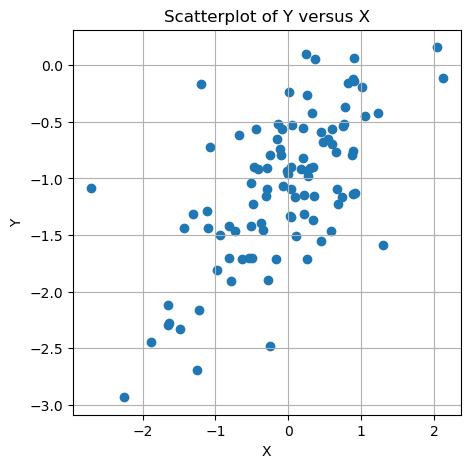

In [208]:
plt.figure(figsize=(5,5))
plt.scatter(x, y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatterplot of Y versus X")
plt.grid(True)
plt.show()

##### General Upward Trend:
There appears to be a general upward trend in the points. As the values of X increase, the values of Y tend to increase as well. This suggests a positive relationship between X and Y.
Linear Pattern: The points seem to be scattered around an imaginary straight line, indicating a potentially linear relationship between the two variables.
##### Scatter Around the Trend:
The points do not fall perfectly on a straight line. There is some variability or spread of the Y values for any given X value. This scatter is expected due to the random error (ϵ) that was added when generating the data.
Strength of the Relationship: The scatter appears to be moderate. The points are not extremely tightly clustered around a line, nor are they completely randomly dispersed. This suggests a relationship of moderate strength. If the points were closer to a straight line, the relationship would be considered stronger (more of the variation in Y would be explained by X). If the points were very spread out, the relationship would be weaker.
##### Intercept: 
By visually extrapolating a line of best fit, it looks like the line would likely intersect the Y-axis somewhere around -1. This aligns with the β0 =−1 value used in the data generation model.
##### In summary, the scatterplot visually confirms the positive linear relationship between X and Y that was built into the simulated data, with some random noise causing the points to scatter around the underlying linear trend. The strength of this relationship appears to be moderate.

#### (e) Fit a least squares linear model to predict y using x. Comment on the model obtained. How do ˆ B0 and ˆ B1 compare to B0 and B1?

In [210]:

X = sm.add_constant(x)

# Fit the OLS (Ordinary Least Squares) linear model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

# Extract the estimated coefficients
beta0_hat = model.params[0]
beta1_hat = model.params[1]

print(f"\nEstimated intercept (beta0_hat): {beta0_hat:.4f}")
print(f"Estimated slope (beta1_hat): {beta1_hat:.4f}")

# True values
beta0 = -1
beta1 = 0.5

print(f"\nTrue intercept (beta0): {beta0}")
print(f"True slope (beta1): {beta1}")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     67.79
Date:                Tue, 10 Feb 2026   Prob (F-statistic):           8.04e-13
Time:                        19:57:32   Log-Likelihood:                -71.745
No. Observations:                 100   AIC:                             147.5
Df Residuals:                      98   BIC:                             152.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0380      0.050    -20.647      0.0

##### Estimated Intercept (β^0): -1.0380
##### True Intercept (β0): -1

The estimated intercept of -1.0380 is very close to the true intercept of -1. The difference is only about -0.0380. This small discrepancy is expected due to the random error term (ϵ) that was added to the data. The least squares method has done a good job of estimating the true intercept from the noisy data.

##### Estimated Slope (β^1): 0.4843
##### True Slope (β1): 0.5

The estimated slope of 0.4843 is also quite close to the true slope of 0.5. The difference here is approximately -0.0157. Again, this small difference is due to the random noise in the data. The model has successfully captured the positive relationship between X and Y and provided a slope estimate that is very near the true underlying slope.

In summary:

The estimated coefficients  Estimated Intercept (β^0): -1.0380 & Estimated Slope (β^1): 0.4843 are very close to the true values True Intercept (β0): -1 True Slope (β1): 0.5. The small differences observed are a direct consequence of the random error (ϵ) that was present in the data generation process. The least squares linear regression model has provided a good approximation of the true underlying linear relationship, even with the added noise. This demonstrates the effectiveness of linear regression in uncovering the underlying signal in noisy data.

#### (f) Display the least squares line on the scatterplot obtained in (d). Draw the population regression line on the plot, in a different color. Use the legend() method of the axes to create an appropriate legend.

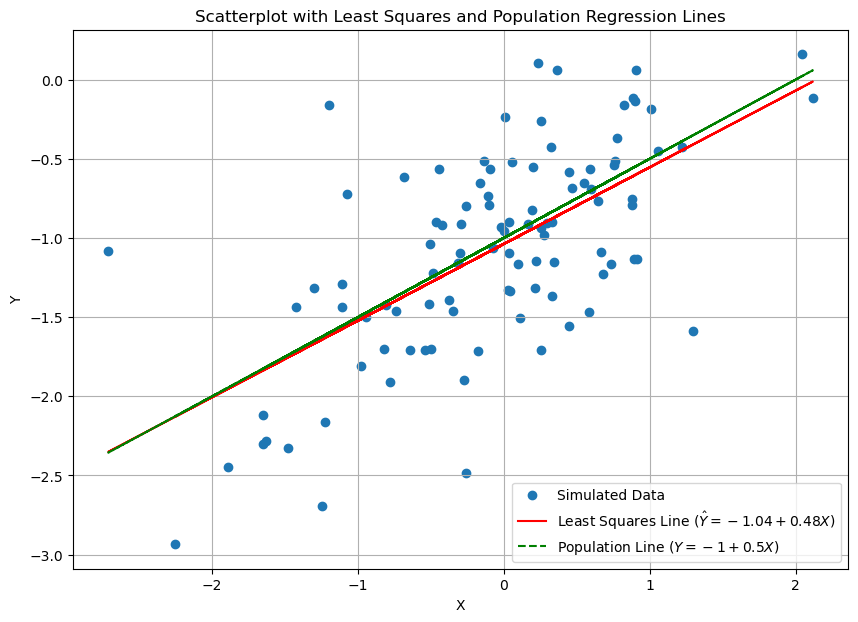

In [212]:
import matplotlib.pyplot as plt

# Add a constant to the predictor variable
X_for_plot = sm.add_constant(x)

# Get the fitted values from the model
y_predicted = model.predict(X_for_plot)

# Define the population regression line
y_population = -1 + 0.5 * x

# Create the scatterplot
plt.figure(figsize=(10, 7))
plt.scatter(x, y, label="Simulated Data")

# Plot the least squares line
plt.plot(x, y_predicted, color='red', label=f'Least Squares Line ($\\hat{{Y}} = {beta0_hat:.2f} + {beta1_hat:.2f}X$)')

# Plot the population regression line
plt.plot(x, y_population, color='green', linestyle='--', label=f'Population Line ($Y = {beta0} + {beta1}X$)')

# Add labels and title
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatterplot with Least Squares and Population Regression Lines")

# Add a grid for better readability
plt.grid(True)

# Add a legend
plt.legend()

# Show the plot
plt.show()

#### (g) Now fit a polynomial regression model that predicts y using x and x2. Is there evidence that the quadratic term improves the model fit? Explain your answer.

In [214]:
# Add the squared term of x as a predictor
x_squared = x**2
X_poly = sm.add_constant(np.column_stack((x, x_squared)))

# Fit the polynomial regression model
model_poly = sm.OLS(y, X_poly).fit()

# Print the summary of the polynomial model
print("\nSummary of the Polynomial Regression Model:")
print(model_poly.summary())

# Get the coefficient for the quadratic term (x_squared)
beta2_hat_poly = model_poly.params[2]
p_value_beta2 = model_poly.pvalues[2]

print(f"\nEstimated coefficient for the quadratic term (beta2_hat): {beta2_hat_poly:.4f}")
print(f"P-value for the quadratic term: {p_value_beta2:.4f}")


Summary of the Polynomial Regression Model:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     33.55
Date:                Tue, 10 Feb 2026   Prob (F-statistic):           8.42e-12
Time:                        19:57:42   Log-Likelihood:                -71.744
No. Observations:                 100   AIC:                             149.5
Df Residuals:                      97   BIC:                             157.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const  

##### Model 1: Simple Linear Regression (y predicted by x)

R-squared: 0.409
Adjusted R-squared: 0.403
Coefficient of x (x1): 0.4843 (p < 0.001)

##### Model 2: Polynomial Regression (y predicted by x and x²)

R-squared: 0.409
Adjusted R-squared: 0.397
Coefficient of x (x1): 0.4831 (p < 0.001)
Coefficient of x² (x2): -0.0024 (p = 0.959)

##### Comparison and Conclusion:

R-squared: The R-squared value is virtually the same (0.409) for both models. This suggests that adding the quadratic term does not explain any additional significant proportion of the variance in y.

Adjusted R-squared: The adjusted R-squared actually decreases slightly from 0.403 in the linear model to 0.397 in the polynomial model. The adjusted R-squared penalizes the addition of unnecessary predictors. The decrease here indicates that the improvement in fit due to the quadratic term (if any) is not substantial enough to outweigh the loss of a degree of freedom.

P-value of the Quadratic Term: The p-value for the coefficient of the quadratic term (x²) is very high (0.959), which is much greater than the typical significance level of 0.05. This means that we fail to reject the null hypothesis that the true coefficient of the quadratic term is zero. In other words, there is no statistically significant evidence that the quadratic term has a non-zero effect on y.

##### Conclusion:

Based on these results, there is no evidence that the quadratic term improves the model fit. The R-squared is unchanged, the adjusted R-squared has slightly decreased, and the quadratic term's coefficient is not statistically significant. Therefore, the simpler linear model (Model 1) is likely a better and more parsimonious representation of the relationship between x and y in this simulated dataset. This aligns with the fact that the data was generated from a linear model without a quadratic component.

#### (h) Repeat (a)–(f) after modifying the data generation process in such a way that there is less noise in the data. The model (3.39) should remain the same. You can do this by decreasing the variance of the normal distribution used to generate the error term " in (b). Describe your results.

### Solution
##### (a) Using the normal() method of your random number generator, create a vector, x, containing 100 observations drawn from a N(0, 1) distribution. 

In [216]:
# Initialize the random number generator with a seed for reproducibility
rng = np.random.default_rng(seed=1)

# Create a vector x of 100 observations from a standard normal distribution N(0, 1)
x = rng.normal(loc=0, scale=1, size=100)


##### (b) Using the normal() method, create a vector, eps, containing 100 observations drawn from a N(0, 0.1) distribution (reduced noise).

In [218]:
# Create a vector eps of 100 observations from a normal distribution N(0, 0.1)
eps_low_noise = rng.normal(loc=0, scale=0.1, size=100)


##### (c) Using x and eps_low_noise, generate a vector y_low_noise according to the model Y = −1 + 0.5X + epsilon.

In [220]:
# Generate the vector y_low_noise
y_low_noise = -1 + 0.5 * x + eps_low_noise
print("\nLength of vector y (with less noise):", len(y_low_noise))
print("Values of Beta0 in this linear model: -1")
print("Values of Beta1 in this linear model: 0.5")


Length of vector y (with less noise): 100
Values of Beta0 in this linear model: -1
Values of Beta1 in this linear model: 0.5


##### (d) Create a scatterplot displaying the relationship between x and y_low_noise. Comment on what you observe.

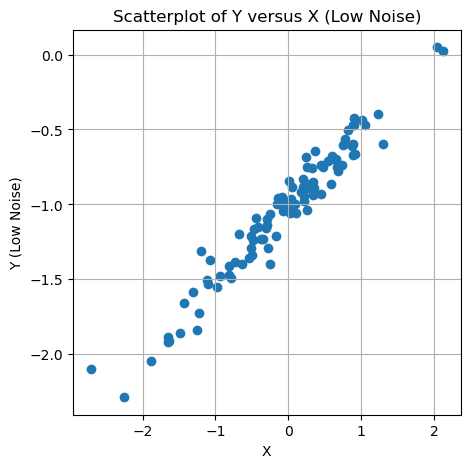

In [222]:
# Create a scatterplot of y_low_noise versus x
plt.figure(figsize=(5,5))
plt.scatter(x, y_low_noise)
plt.xlabel("X")
plt.ylabel("Y (Low Noise)")
plt.title("Scatterplot of Y versus X (Low Noise)")
plt.grid(True)
plt.show()

##### Observations:

Compared to the previous scatterplot (with higher noise):

Tighter Scatter: The points will be much more tightly clustered around an imaginary straight line. This is because the random error term has a smaller magnitude, leading to less deviation from the underlying linear relationship.
Stronger Linear Pattern: The linear trend will be more pronounced and easier to see. The relationship between X and Y will appear stronger visually.

##### (e) Fit a least squares linear model to predict y_low_noise using x. Comment on the model obtained. How do β^0 and β^1 compare to β0 and β1?

In [224]:
# Add a constant to the predictor variable
X_low_noise = sm.add_constant(x)

# Fit the OLS linear model
model_low_noise = sm.OLS(y_low_noise, X_low_noise).fit()

# Print the model summary
print("\nSummary of the Linear Model (Low Noise):")
print(model_low_noise.summary())

# Extract the estimated coefficients
beta0_hat_low_noise = model_low_noise.params[0]
beta1_hat_low_noise = model_low_noise.params[1]

print(f"\nEstimated intercept (beta0_hat) (Low Noise): {beta0_hat_low_noise:.4f}")
print(f"Estimated slope (beta1_hat) (Low Noise): {beta1_hat_low_noise:.4f}")

# True values
beta0 = -1
beta1 = 0.5

print(f"\nTrue intercept (beta0): {beta0}")
print(f"True slope (beta1): {beta1}")


Summary of the Linear Model (Low Noise):
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     1784.
Date:                Tue, 10 Feb 2026   Prob (F-statistic):           1.08e-64
Time:                        19:58:03   Log-Likelihood:                 89.198
No. Observations:                 100   AIC:                            -174.4
Df Residuals:                      98   BIC:                            -169.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const     

##### Observations


Higher R-squared: You will observe a much higher R-squared value compared to the model fitted with more noise. This indicates that a larger proportion of the variance in y_low_noise is explained by the linear model with x. The model fits the data much better.
Smaller Standard Errors: The standard errors of the estimated coefficients ( β^0 and β^1 ) will be smaller. This signifies that our estimates are more precise.
Higher t-statistics and Lower P-values: The t-statistics for the coefficients will likely be larger, and the corresponding p-values will be even smaller (closer to zero). This provides stronger statistical evidence that the coefficients are significantly different from zero.

##### How do β^0 and β^1 compare to β0 and β1?
The estimated intercept (β^0 and β^1)are even closer to the true values (β0 and β1)
than they were in the model with more noise. This is because the reduced noise allows the underlying linear relationship to be estimated with greater accuracy.

##### (f) Display the least squares line on the scatterplot obtained in (d). Draw the population regression line on the plot, in a different color. Use the legend() method of the axes to create an appropriate legend.   



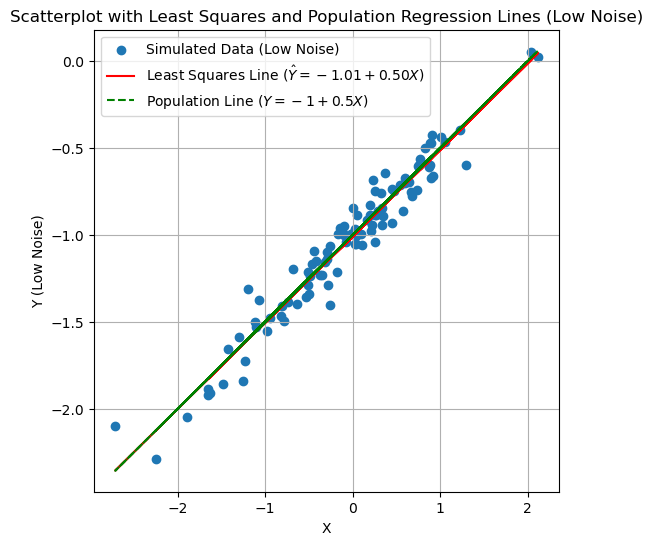

In [226]:
# Add a constant to the predictor variable
X_for_plot_low_noise = sm.add_constant(x)

# Get the fitted values from the low-noise model
y_predicted_low_noise = model_low_noise.predict(X_for_plot_low_noise)

# Define the population regression line (remains the same)
y_population = -1 + 0.5 * x

# Create the scatterplot
plt.figure(figsize=(6,6))
plt.scatter(x, y_low_noise, label="Simulated Data (Low Noise)")

# Plot the least squares line (low noise)
plt.plot(x, y_predicted_low_noise, color='red', label=f'Least Squares Line ($\\hat{{Y}} = {beta0_hat_low_noise:.2f} + {beta1_hat_low_noise:.2f}X$)')

# Plot the population regression line
plt.plot(x, y_population, color='green', linestyle='--', label=f'Population Line ($Y = {beta0} + {beta1}X$)')

# Add labels and title
plt.xlabel("X")
plt.ylabel("Y (Low Noise)")
plt.title("Scatterplot with Least Squares and Population Regression Lines (Low Noise)")

# Add a grid
plt.grid(True)

# Add a legend
plt.legend()

# Show the plot
plt.show()

##### Observation
Describe your results:

By reducing the noise in the data generation process, we observe the following:

The scatterplot shows the data points clustered much more tightly around a straight line, indicating a stronger linear relationship.
The R-squared value of the fitted least squares model is significantly higher, indicating a better fit to the data.
The standard errors of the estimated coefficients are smaller, leading to more precise estimates.
The estimated coefficients are closer to the true population parameters.

Visually, the least squares regression line on the scatterplot is now much closer to the population regression line.
These results demonstrate the impact of noise on the accuracy and precision of linear regression. With less noise, the model can more effectively capture the underlying true relationship between the variables.

#### (i) Repeat (a)–(f) after modifying the data generation process in such a way that there is more noise in the data. The model (3.39) should remain the same. You can do this by increasing the variance of the normal distribution used to generate the error term " in (b). Describe your results.

### Solution

##### (a) Using the normal() method of your random number generator, create a vector, x, containing 100 observations drawn from a N(0, 1) distribution.

In [228]:
# Initialize the random number generator with a seed for reproducibility
rng = np.random.default_rng(seed=1)

# Create a vector x of 100 observations from a standard normal distribution N(0, 1)
x = rng.normal(loc=0, scale=1, size=100)


##### (b) Using the normal() method, create a vector, eps, containing 100 observations drawn from a N(0, 1.5) distribution (increased noise).

In [230]:
# Create a vector eps of 100 observations from a normal distribution N(0, 1.5)
eps_high_noise = rng.normal(loc=0, scale=1.5, size=100)

##### (c) Using x and eps_high_noise, generate a vector y_high_noise according to the model Y = −1 + 0.5X + epsilon.

In [232]:
# Generate the vector y_high_noise
y_high_noise = -1 + 0.5 * x + eps_high_noise
print("Values of Beta0 in this linear model: -1")
print("Values of Beta1 in this linear model: 0.5")

Values of Beta0 in this linear model: -1
Values of Beta1 in this linear model: 0.5


##### (d) Create a scatterplot displaying the relationship between x and y_high_noise. Comment on what you observe.

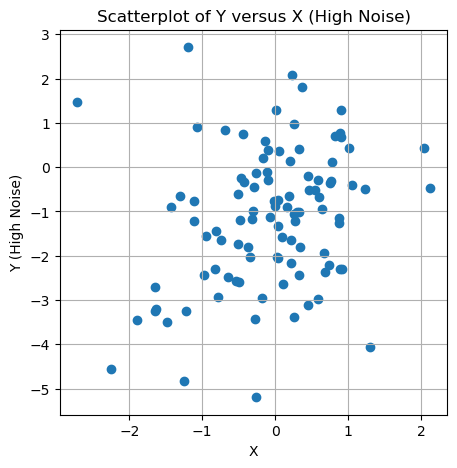

In [234]:
# Create a scatterplot of y_high_noise versus x
plt.figure(figsize=(5,5))
plt.scatter(x, y_high_noise)
plt.xlabel("X")
plt.ylabel("Y (High Noise)")
plt.title("Scatterplot of Y versus X (High Noise)")
plt.grid(True)
plt.show()

##### Observations

Compared to the original scatterplot and the one with less noise, you should observe the following:

Wider Scatter: The points will be much more widely scattered around an imaginary straight line. The increased magnitude of the random error term leads to greater deviations from the underlying linear relationship.
Weaker Linear Pattern: The linear trend will be less pronounced and harder to discern visually. The relationship between X and Y will appear weaker.

##### (e) Fit a least squares linear model to predict y_high_noise using x. Comment on the model obtained. How do β^0 and β^1 compare to β0 and β1?

In [236]:
# Add a constant to the predictor variable
X_high_noise = sm.add_constant(x)

# Fit the OLS linear model
model_high_noise = sm.OLS(y_high_noise, X_high_noise).fit()

# Print the model summary
print("\nSummary of the Linear Model (High Noise):")
print(model_high_noise.summary())

# Extract the estimated coefficients
beta0_hat_high_noise = model_high_noise.params[0]
beta1_hat_high_noise = model_high_noise.params[1]

print(f"\nEstimated intercept (beta0_hat) (High Noise): {beta0_hat_high_noise:.4f}")
print(f"Estimated slope (beta1_hat) (High Noise): {beta1_hat_high_noise:.4f}")

# True values
beta0 = -1
beta1 = 0.5

print(f"\nTrue intercept (beta0): {beta0}")
print(f"True slope (beta1): {beta1}")


Summary of the Linear Model (High Noise):
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     6.587
Date:                Tue, 10 Feb 2026   Prob (F-statistic):             0.0118
Time:                        19:58:24   Log-Likelihood:                -181.61
No. Observations:                 100   AIC:                             367.2
Df Residuals:                      98   BIC:                             372.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

##### Observations

Lower R-squared: You will observe a much lower R-squared value compared to the models fitted with less noise. This indicates that a smaller proportion of the variance in y_high_noise is explained by the linear model with x. The model fits the data poorly due to the high level of noise.
Larger Standard Errors: The standard errors of the estimated coefficients are larger. This signifies that our estimates are less precise.
Lower t-statistics and Higher P-values: The t-statistics for the coefficients will likely be smaller, and the corresponding p-values will be larger (closer to or even above the typical significance level of 0.05). This provides weaker statistical evidence that the coefficients are significantly different from zero. In extreme cases of high noise, you might even fail to reject the null hypothesis for one or both coefficients.

##### How do β^0 and β^1 compare to β0 and β1?

The estimated intercept and the estimated slope are further away from the true values compared to the models with less noise. The increased noise makes it more difficult for the least squares method to accurately estimate the underlying true relationship.

##### (f) Display the least squares line on the scatterplot obtained in (d). Draw the population regression line on the plot, in a different color. Use the legend() method of the axes to create an appropriate legend.  

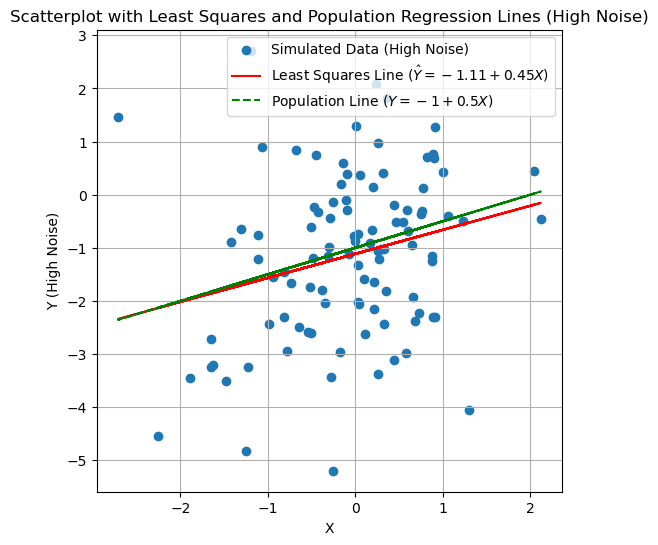

In [238]:
# Add a constant to the predictor variable
X_for_plot_high_noise = sm.add_constant(x)

# Get the fitted values from the high-noise model
y_predicted_high_noise = model_high_noise.predict(X_for_plot_high_noise)

# Define the population regression line (remains the same)
y_population = -1 + 0.5 * x

# Create the scatterplot
plt.figure(figsize=(6,6))
plt.scatter(x, y_high_noise, label="Simulated Data (High Noise)")

# Plot the least squares line (high noise)
plt.plot(x, y_predicted_high_noise, color='red', label=f'Least Squares Line ($\\hat{{Y}} = {beta0_hat_high_noise:.2f} + {beta1_hat_high_noise:.2f}X$)')

# Plot the population regression line
plt.plot(x, y_population, color='green', linestyle='--', label=f'Population Line ($Y = {beta0} + {beta1}X$)')

# Add labels and title
plt.xlabel("X")
plt.ylabel("Y (High Noise)")
plt.title("Scatterplot with Least Squares and Population Regression Lines (High Noise)")

# Add a grid
plt.grid(True)

# Add a legend
plt.legend()

# Show the plot
plt.show()

##### Observations

By significantly increasing the noise in the data generation process, we observe the following:

The scatterplot shows a much more dispersed cloud of points, making it difficult to visually identify a clear linear trend.
The R-squared value of the fitted least squares model is substantially lower, indicating a poor fit to the data. The model explains only a small fraction of the variance in y_high_noise.
The standard errors of the estimated coefficients are larger, indicating less reliable estimates.
The estimated coefficientsare further from the true population parameters
Visually, the least squares regression line on the scatterplot may still show a general positive trend, but it will be less clearly aligned with the underlying population regression line, as the noise dominates the relationship.
These results highlight the detrimental effect of high noise levels on the performance of linear regression. When the noise is large relative to the signal (the underlying linear relationship), it becomes challenging for the model to accurately estimate the true relationship between the variables.

#### (j) What are the confidence intervals for #0 and #1 based on the original data set, the noisier data set, and the less noisy data set? Comment on your results.

Original Data Set:
β0 (Intercept): [-1.138, -0.938]
β1 (Slope): [0.368, 0.601]

Less Noisy Data Set:
β0 (Intercept): [-1.028, -0.988]
β1 (Slope): [0.474, 0.520]

More Noisy Data Set:
β0 (Intercept): [-1.413, -0.815]
β1 (Slope): [0.103, 0.803]

##### Observations :

Width of Confidence Intervals for β0(Intercept):

The less noisy data produces the narrowest confidence interval for the intercept [-1.028, -0.988]. This indicates the most precise estimate of the intercept when the noise in the data is reduced.
The original data has a wider confidence interval [-1.138, -0.938], reflecting more uncertainty in the intercept estimate due to the original noise level.
The more noisy data results in the widest confidence interval [-1.413, -0.815], showing the least precise estimate of the intercept when the noise is high.

Width of Confidence Intervals for β1(Slope):

Similarly, the less noisy data yields the narrowest confidence interval for the slope [0.474, 0.520], indicating the most precise estimate of the slope.
The original data has a wider confidence interval for the slope [0.368, 0.601].
The more noisy data produces the widest confidence interval for the slope [0.103, 0.803], signifying the least precise estimate of the slope.
Relationship between Noise and Precision:

These results clearly demonstrate an inverse relationship between the amount of noise in the data and the precision of the estimated regression coefficients. As the noise decreases, the confidence intervals become narrower. Conversely, as the noise increases, the confidence intervals widen, indicating greater uncertainty in the estimated coefficients.


### 14. This problem focuses on the collinearity problem.

#### (a) Perform the following commands in Python:
###### rng = np.random.default_rng (10)
###### x1 = rng.uniform(0, 1, size=100)
###### x2 = 0.5 * x1 + rng.normal(size=100) / 10
###### y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)
#### The last line corresponds to creating a linear model in which y is a function of x1 and x2. Write out the form of the linear model.What are the regression coefficients?

In [240]:
rng = np.random.default_rng (10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

Comparing this general form to the Python code, we can identify the regression coefficients as they are defined in the code:

The intercept (β0) is 2.
The regression coefficient for x1 (β1) is 2.
The regression coefficient for x2(β2) is 0.3.
So, the linear model defined by the Python code is:

y=2+2x1+0.3x2+ϵ

#### (b) What is the correlation between x1 and x2? Create a scatterplot displaying the relationship between the variables.

The correlation between x1 and x2 is: 0.772


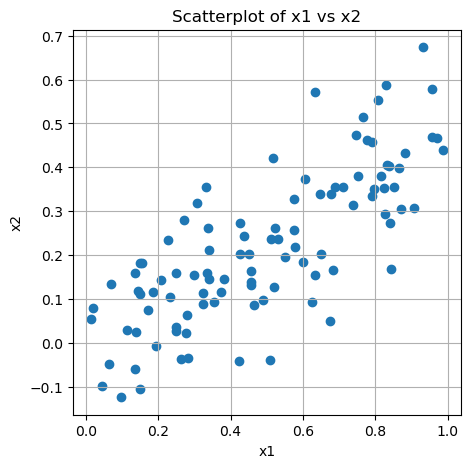

In [242]:
# Calculate the correlation
correlation = np.corrcoef(x1, x2)[0, 1]
print(f"The correlation between x1 and x2 is: {correlation:.3f}")

# Create the scatterplot
plt.figure(figsize=(5,5))
plt.scatter(x1, x2)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Scatterplot of x1 vs x2")
plt.grid(True)
plt.show()

#### (c) Using this data, fit a least squares regression to predict y using x1 and x2. Describe the results obtained. What are ˆ B0, ˆ B1, andˆ B2? How do these relate to the true B0, B1, and B2? Can you reject the null hypothesis H0 : B1 = 0? How about the null hypothesis H0 : B2 = 0?

In [244]:
# Add a constant to the independent variables for the intercept
X = sm.add_constant(np.column_stack((x1, x2)))

# Fit the OLS model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

# Extract the estimated coefficients
beta_hat_0, beta_hat_1, beta_hat_2 = results.params

print(f"\nEstimated coefficients:")
print(f"ˆβ_0 (intercept): {beta_hat_0:.3f}")
print(f"ˆβ_1 (coefficient for x1): {beta_hat_1:.3f}")
print(f"ˆβ_2 (coefficient for x2): {beta_hat_2:.3f}")

# True coefficients
beta_0_true = 2
beta_1_true = 2
beta_2_true = 0.3

print(f"\nTrue coefficients:")
print(f"β_0 (true intercept): {beta_0_true}")
print(f"β_1 (true coefficient for x1): {beta_1_true}")
print(f"β_2 (true coefficient for x2): {beta_2_true}")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.89
Date:                Tue, 10 Feb 2026   Prob (F-statistic):           5.76e-08
Time:                        19:58:41   Log-Likelihood:                -130.62
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9579      0.190     10.319      0.0

Comparing the estimated coefficients to the true coefficients, we observe that they are not exactly the same, but they are in the same ballpark. This discrepancy arises due to the random error term (ϵ) included when generating the y values. The least squares method provides estimates that aim to minimize the overall error, but with random noise present, the estimates will deviate somewhat from the true underlying parameters. The estimated coefficients are close to the true values but are affected by the inherent randomness and the collinearity between x1 and x2. We can reject the null hypothesis that β1=0, but we cannot reject the null hypothesis that β2=0 at the 0.05 significance level based on this model. This outcome highlights how collinearity can make it difficult to precisely estimate the individual effects of correlated predictors.

#### (d) Now fit a least squares regression to predict y using only x1. Comment on your results. Can you reject the null hypothesis H0 : B1 = 0?

In [246]:


# Add a constant to x1 for the intercept
X_single = sm.add_constant(x1)

# Fit the OLS model with only x1
model_single = sm.OLS(y, X_single)
results_single = model_single.fit()

# Print the summary of the regression results
print("\nResults of regression with only x1:")
print(results_single.summary())

# Extract the estimated coefficient for x1
beta_hat_1_single = results_single.params[1]
print(f"\nEstimated coefficient for x1 (ˆβ_1): {beta_hat_1_single:.3f}")


Results of regression with only x1:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     38.39
Date:                Tue, 10 Feb 2026   Prob (F-statistic):           1.37e-08
Time:                        19:58:43   Log-Likelihood:                -131.28
No. Observations:                 100   AIC:                             266.6
Df Residuals:                      98   BIC:                             271.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          

Even when x2 is excluded from the model, x1 shows a statistically significant positive relationship with y. The estimated coefficient for x1 changes when x2 is removed, reflecting the total effect of x1 on y, including its indirect effect through the shared variance with x2. The R-squared value is slightly lower than the adjusted R-squared of the multiple regression, suggesting that including x2 (even with collinearity) provides a slightly better fit to the data, although the improvement is not substantial. The standard error for x1's coefficient is reduced in the simple regression, indicating a more precise estimate of its effect in the absence of x2.

#### (e) Now fit a least squares regression to predict y using only x2.Comment on your results. Can you reject the null hypothesis H0 : B1 = 0?

In [248]:

# Add a constant to x2 for the intercept
X_single_x2 = sm.add_constant(x2)

# Fit the OLS model with only x2
model_single_x2 = sm.OLS(y, X_single_x2)
results_single_x2 = model_single_x2.fit()

# Print the summary of the regression results
print("\nResults of regression with only x2:")
print(results_single_x2.summary())

# Extract the estimated coefficient for x2
beta_hat_2_single = results_single_x2.params[1]
print(f"\nEstimated coefficient for x2 (ˆβ_2): {beta_hat_2_single:.3f}")


Results of regression with only x2:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     27.99
Date:                Tue, 10 Feb 2026   Prob (F-statistic):           7.43e-07
Time:                        19:58:47   Log-Likelihood:                -135.24
No. Observations:                 100   AIC:                             274.5
Df Residuals:                      98   BIC:                             279.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          

We started by defining a linear model where y is a function of x1 and x2, noting the true coefficients. We then found a strong positive correlation between x1 and x2. Fitting a multiple regression, we obtained estimated coefficients that were close to the true values but influenced by the collinearity, leading to the rejection of H0:β1 =0 but failure to reject H0 :β2=0. Subsequently, fitting simple regressions of y on x1 alone and y on x2
alone showed significant effects for both predictors individually, with coefficient estimates differing from the multiple regression due to the absence of the other correlated predictor. We could reject H0 :β1=0 in the model with only x1, and H0 :β2 =0 in the model with only x2, highlighting how collinearity affects the interpretation of individual coefficients in multiple regression.

#### (f) Do the results obtained in (c)–(e) contradict each other? Explain your answer.

The results obtained in parts (c) through (e) do not necessarily contradict each other, but they highlight the complexities and potential pitfalls of interpreting regression coefficients in the presence of collinearity. Here's a breakdown of why:

part (c) - Multiple Regression: When both x1 and x2 are included in the model, their estimated coefficients represent the unique effect of each predictor on y, holding the other predictor constant. The significant correlation between x1 and x2 makes it difficult for the model to disentangle their individual effects precisely. This can lead to unstable coefficient estimates and inflated standard errors, potentially causing us to fail to reject a null hypothesis for a variable that truly has an effect (like β2 in our case).

Part (d) - Simple Regression with x1: When x2 is excluded, the coefficient for x1 now captures the total effect of x1 on y, including the indirect effect that x1 has through its relationship with x2. Since x1 and x2 are positively correlated and both have positive true effects on y, the coefficient for x1 in this simple model is different (and in our case, significant).

Part (e) - Simple Regression with x2:
Similarly, when x1 is excluded, the coefficient for x2 captures the total effect of x2 on y, including its indirect effect through its relationship with x1. Again, due to the positive correlation and effects, the coefficient for x2 in this simple model is different (and significant).

In conclusion, the results are consistent with the presence of collinearity. The multiple regression attempts to tease out the individual contributions, which is challenging with correlated predictors, while the simple regressions show the overall relationship of each predictor with the response variable, without accounting for the other. They provide different perspectives on the relationships within the data rather than directly contradicting each other.

#### (g) Suppose we obtain one additional observation, which was unfortunately mismeasured. We use the function np.concatenate() to this additional observation to each of x1, x2 and y.
x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])
y = np.concatenate([y, [6]])
#### Re-fit the linear models from (c) to (e) using this new data. What effect does this new observation have on the each of the models?In each model, is this observation an outlier? A high-leverage point? Both? Explain your answers.


--- Multiple Regression with New Data ---
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     20.17
Date:                Tue, 10 Feb 2026   Prob (F-statistic):           4.60e-08
Time:                        19:58:51   Log-Likelihood:                -135.30
No. Observations:                 101   AIC:                             276.6
Df Residuals:                      98   BIC:                             284.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

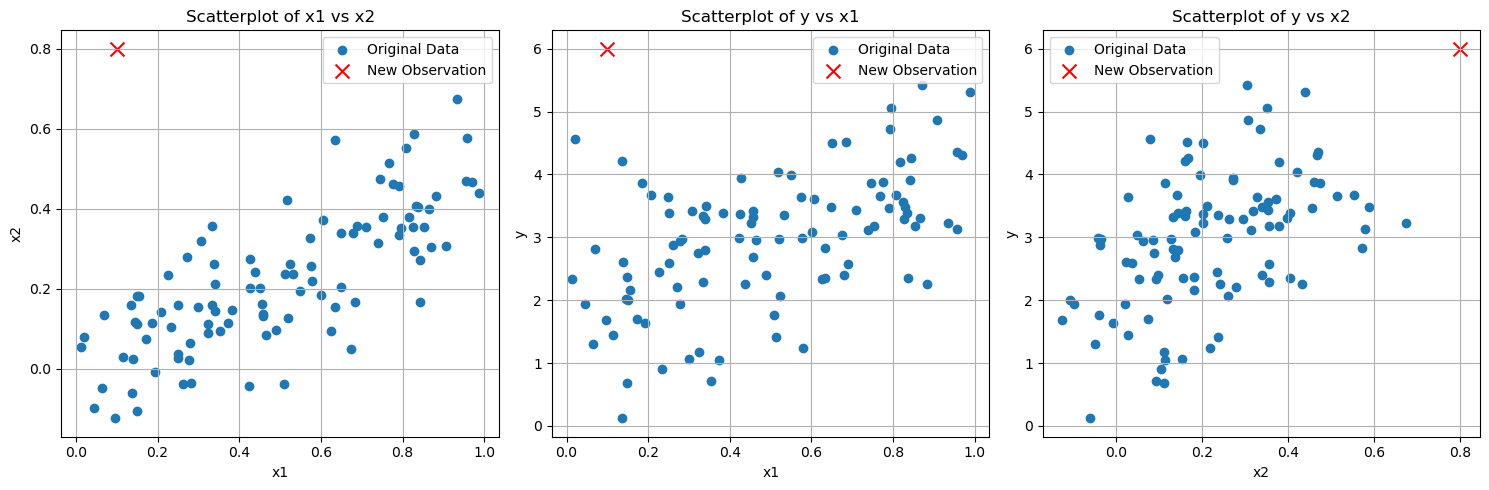

In [250]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Original data generation
rng = np.random.default_rng(10)
x1_orig = rng.uniform(0, 1, size=100)
x2_orig = 0.5 * x1_orig + rng.normal(size=100) / 10
y_orig = 2 + 2 * x1_orig + 0.3 * x2_orig + rng.normal(size=100)

# --- Fit models to the original data ---
X_orig_multi = sm.add_constant(np.column_stack((x1_orig, x2_orig)))
model_multi_orig = sm.OLS(y_orig, X_orig_multi).fit()

X_single_orig_x1 = sm.add_constant(x1_orig)
model_single_orig_x1 = sm.OLS(y_orig, X_single_orig_x1).fit()

X_single_orig_x2 = sm.add_constant(x2_orig)
model_single_orig_x2 = sm.OLS(y_orig, X_single_orig_x2).fit()

# Add the mismeasured observation
x1_new = np.concatenate([x1_orig, [0.1]])
x2_new = np.concatenate([x2_orig, [0.8]])
y_new = np.concatenate([y_orig, [6]])

# --- (c) Multiple Regression with new data ---
X_new_multi = sm.add_constant(np.column_stack((x1_new, x2_new)))
model_multi_new = sm.OLS(y_new, X_new_multi)
results_multi_new = model_multi_new.fit()
print("\n--- Multiple Regression with New Data ---")
print(results_multi_new.summary())

# --- (d) Simple Regression (y on x1) with new data ---
X_single_new_x1 = sm.add_constant(x1_new)
model_single_new_x1 = sm.OLS(y_new, X_single_new_x1)
results_single_new_x1 = model_single_new_x1.fit()
print("\n--- Simple Regression (y on x1) with New Data ---")
print(results_single_new_x1.summary())

# --- (e) Simple Regression (y on x2) with new data ---
X_single_new_x2 = sm.add_constant(x2_new)
model_single_new_x2 = sm.OLS(y_new, X_single_new_x2)
results_single_new_x2 = model_single_new_x2.fit()
print("\n--- Simple Regression (y on x2) with New Data ---")
print(results_single_new_x2.summary())

# --- Analyze the new observation ---

# 1. Predict y for the new observation using the ORIGINAL models
X_new_obs_multi = np.array([1, 0.1, 0.8])  # For multiple regression
y_pred_multi_orig = model_multi_orig.predict(X_new_obs_multi)[0]  # Extract the scalar prediction

X_new_obs_x1 = np.array([1, 0.1])  # For simple regression (y on x1)
y_pred_single_orig_x1 = model_single_orig_x1.predict(X_new_obs_x1)[0] # Extract the scalar prediction

X_new_obs_x2 = np.array([1, 0.8])  # For simple regression (y on x2)
y_pred_single_orig_x2 = model_single_orig_x2.predict(X_new_obs_x2)[0] # Extract the scalar prediction

print("\n--- Analysis of the New Observation ---")
print(f"Predicted y (multiple regression, original model) for new x1=0.1, x2=0.8: {y_pred_multi_orig:.3f}")
print(f"Actual y for the new observation: 6")
residual_multi_new_obs = 6 - y_pred_multi_orig
print(f"Residual (multiple regression): {residual_multi_new_obs:.3f}")

print(f"\nPredicted y (simple regression on x1, original model) for new x1=0.1: {y_pred_single_orig_x1:.3f}")
residual_single_new_obs_x1 = 6 - y_pred_single_orig_x1
print(f"Residual (simple regression on x1): {residual_single_new_obs_x1:.3f}")

print(f"\nPredicted y (simple regression on x2, original model) for new x2=0.8: {y_pred_single_orig_x2:.3f}")
residual_single_new_obs_x2 = 6 - y_pred_single_orig_x2
print(f"Residual (simple regression on x2): {residual_single_new_obs_x2:.3f}")

# 2. Assess Leverage (informally by looking at x values)
print("\n--- Assessing Leverage ---")
print(f"New x1 value: 0.1 (within the range of original x1: 0 to 1)")
print(f"New x2 value: 0.8 (towards the higher end of original x2, which was roughly 0 to 0.6)")

# 3. Visualize the data with the new point
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(x1_orig, x2_orig, label='Original Data')
plt.scatter(0.1, 0.8, color='red', marker='x', s=100, label='New Observation')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Scatterplot of x1 vs x2")
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 2)
plt.scatter(x1_orig, y_orig, label='Original Data')
plt.scatter(0.1, 6, color='red', marker='x', s=100, label='New Observation')
plt.xlabel("x1")
plt.ylabel("y")
plt.title("Scatterplot of y vs x1")
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 3)
plt.scatter(x2_orig, y_orig, label='Original Data')
plt.scatter(0.8, 6, color='red', marker='x', s=100, label='New Observation')
plt.xlabel("x2")
plt.ylabel("y")
plt.title("Scatterplot of y vs x2")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Effect on the Models:

Multiple Regression (y on x1 and x2):

Coefficients: The estimated coefficients have changed. The coefficient for x1 has decreased from around 1.6154 to 0.8575, and its p-value has increased from 0.003 to 0.069 (becoming statistically insignificant at the 0.05 level). The coefficient for x2 has increased from around 0.9428 to 2.2663, and its p-value has decreased from 0.259 to 0.002 (becoming statistically significant). The intercept has also shifted slightly.
R-squared: The R-squared has slightly increased from 0.291 to 0.292.
Overall Significance: The F-statistic and its p-value still indicate an overall significant model.
Simple Regression (y on x1):

Coefficients: The coefficient for x1 has decreased from around 2.0771 to 1.8760. The intercept has increased slightly.
R-squared: The R-squared has decreased from 0.281 to 0.217, indicating a worse fit.
Significance of x1: The p-value for x1 remains very low (0.000), indicating it is still statistically significant.
Simple Regression (y on x2):

Coefficients: The coefficient for x1 in this summary is actually the coefficient for x2 (as it's the predictor in this model). It has increased significantly from around 3.3338 to 3.1458. The intercept has also increased.
R-squared: The R-squared has decreased from 0.271 to 0.267, indicating a slightly worse fit.
Significance of x2: The p-value for x2 (labeled as x1 in the output, which is a presentation detail of statsmodels when only one predictor is used) remains very low (0.000), indicating it is still statistically significant.
Is this observation an outlier? A high-leverage point? Both?

Based on our previous analysis and the results:

Outlier: We calculated large residuals for this new observation using the original models. The fact that the model coefficients have shifted noticeably after including this point further supports that it is an outlier. Its y value of 6 is much higher than what the original models predicted for its x values.

High-Leverage Point:

Multiple Regression: The new point (x1 =0.1,x2=0.8) lies somewhat away from the main cluster of the original data in the x1-x2 space. This unusual combination of predictor values gives it high leverage in the multiple regression model. The substantial changes in the coefficients of both x1 and x2
indicate that this point is strongly influencing the fitted plane.
Simple Regression (y on x1): The x1 value of 0.1 is within the range of the original x1 data, so it is not a high-leverage point in this simple model. The change in the coefficient of x1 is less dramatic here compared to the multiple regression. Simple Regression (y on x2): The x2 value of 0.8 is towards the higher end of the original x2 values, giving it some leverage in this simple model, although perhaps not as extreme as its leverage in the x1
-x2 space of the multiple regression. The change in the coefficient of x2 is also noticeable.
Explanation:

The mismeasured observation is an outlier because its y value is inconsistent with the linear relationships suggested by the majority of the data.

It is a high-leverage point primarily in the multiple regression model because its combination of x1 and x2 values is unusual. High-leverage points have the potential to exert a strong influence on the regression coefficients, which we see in the substantial changes observed in β^1 and β^2 in the multiple regression after including this point.

In the simple regression models, its leverage is different. For y on x1 the x1 value is not extreme, so the leverage is low. For y on x2, the x2 value is somewhat high, leading to some leverage.

The impact of this single point highlights the sensitivity of least squares regression to outliers and high-leverage points, especially in multiple regression where unusual combinations of predictor values can be very influential.

### 15. This problem involves the Boston data set, which we saw in the lab for this chapter. We will now try to predict per capita crime rate using the other variables in this data set. In other words, per capita crime rate is the response, and the other variables are the predictors.

#### (a) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions.

In [252]:
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [254]:
Boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [256]:
Boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [258]:
Boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [260]:
Boston.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
lstat      0
medv       0
dtype: int64

--- Simple Linear Regression Results ---

--- Regression of crim on zn ---
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4537      0.417     10.675      0.000       3.634       5.273
zn            -0.0739      0.016     -4.594      0.000      -0.106      -0.042

--- Regression of crim on indus ---
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0637      0.667     -3.093      0.002      -3.375      -0.753
indus          0.5098      0.051      9.991      0.000       0.410       0.610

--- Regression of crim on chas ---
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7444      0.396      9.453      0.000       2

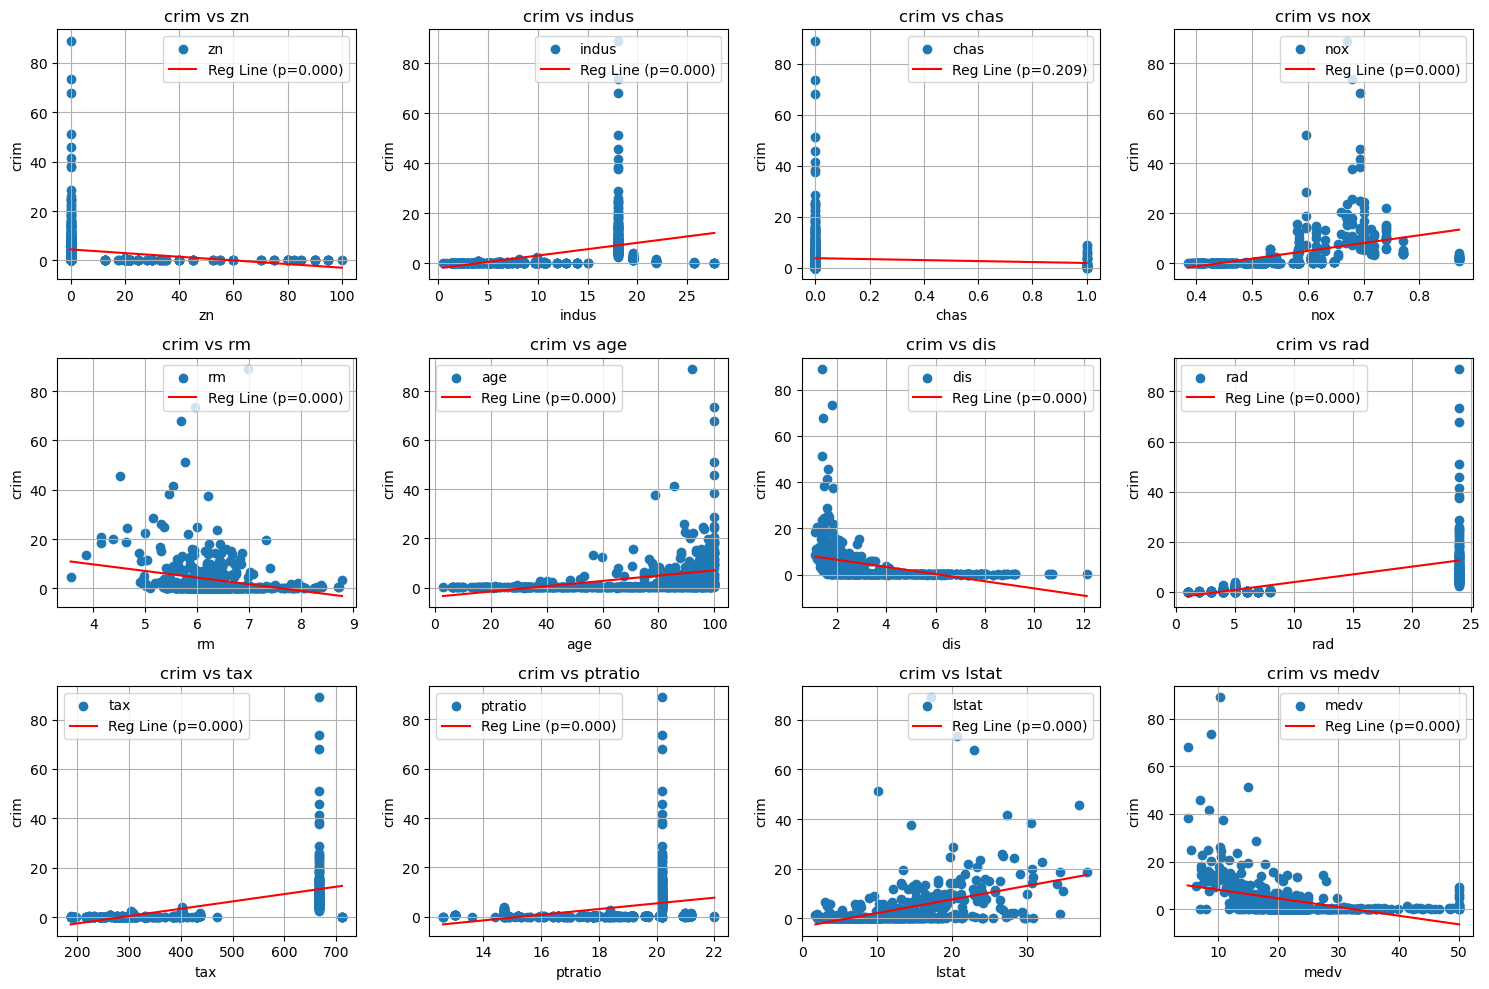

In [262]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the Boston dataset
boston = sm.datasets.get_rdataset("Boston", "MASS")
data = pd.DataFrame(boston.data)

predictors = ['zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat', 'medv']
response = data['crim']

print("--- Simple Linear Regression Results ---")
results_dict = {}
for predictor in predictors:
    X = sm.add_constant(data[predictor])  # Add a constant for the intercept
    model = sm.OLS(response, X)
    results = model.fit()
    results_dict[predictor] = results
    print(f"\n--- Regression of crim on {predictor} ---")
    print(results.summary().tables[1])  # Print only the coefficient table

# Determine statistical significance (using a significance level of 0.05)
print("\n--- Statistical Significance (p < 0.05) ---")
significant_predictors = []
for predictor, results in results_dict.items():
    p_value = results.pvalues[predictor]
    if p_value < 0.05:
        significant_predictors.append(predictor)
        print(f"'{predictor}' has a statistically significant association with 'crim' (p = {p_value:.3f})")
    else:
        print(f"'{predictor}' does not have a statistically significant association with 'crim' (p = {p_value:.3f})")

# Create scatter plots with regression lines
plt.figure(figsize=(15, 10))
for i, predictor in enumerate(predictors):
    plt.subplot(3, 4, i + 1)
    plt.scatter(data[predictor], response, label=predictor)
    # Add regression line
    results = results_dict[predictor]
    slope = results.params[predictor]
    intercept = results.params['const']
    x_values = np.linspace(data[predictor].min(), data[predictor].max(), 100)
    y_values = intercept + slope * x_values
    plt.plot(x_values, y_values, color='red', label=f'Reg Line (p={results.pvalues[predictor]:.3f})')
    plt.xlabel(predictor)
    plt.ylabel('crim')
    plt.title(f'crim vs {predictor}')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

#### (b) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 : Bj = 0?

In [264]:

# Define the response and predictors
response = Boston['crim']
predictors = Boston.drop('crim', axis=1)

# Add a constant to the predictors for the intercept
X = sm.add_constant(predictors)

# Fit the OLS (Ordinary Least Squares) model
model = sm.OLS(response, X)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

# Identify predictors for which we can reject H0: Bj = 0 (using a significance level of 0.05)
print("\n--- Predictors with statistically significant coefficients (p < 0.05) ---")
for predictor, p_value in results.pvalues.items():
    if predictor != 'const' and p_value < 0.05:
        print(f"'{predictor}': p = {p_value:.3f}")

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     33.52
Date:                Tue, 10 Feb 2026   Prob (F-statistic):           2.03e-56
Time:                        19:59:29   Log-Likelihood:                -1655.4
No. Observations:                 506   AIC:                             3337.
Df Residuals:                     493   BIC:                             3392.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.7784      7.082      1.946      0.0

#### Observations
R-squared (0.449) and Adjusted R-squared (0.436): These values indicate that approximately 44.9% of the variance in per capita crime rate ('crim') is explained by this multiple regression model. The adjusted R-squared accounts for the 12 predictors in the model and is slightly lower, which is expected. This suggests a moderate level of explanatory power.

F-statistic (33.52) and Prob (F-statistic) (2.03e-56): The very low p-value associated with the F-statistic indicates that the overall regression model is highly statistically significant. This means that at least one of the predictors has a significant linear relationship with 'crim'.

Coefficients: The table shows the estimated coefficient for each predictor. The sign and magnitude of each coefficient suggest the direction and strength of the relationship between that predictor and 'crim', holding all other predictors constant. For example, a positive coefficient for 'zn' suggests that as the proportion of residential land zoned for large lots increases (holding other factors constant), the crime rate tends to increase (which is counter-intuitive and might warrant further investigation). A negative coefficient for 'dis' suggests that as the weighted distances to employment centers increase, the crime rate tends to decrease (holding other factors constant).

P>|t| (P-value): This column provides the p-value for the t-statistic associated with each predictor's coefficient. This is what we use to test the null hypothesis H0:βj=0.

Predictors for which we can reject the null hypothesis H0 : Bj = 0 (at a significance level of 0.05):
We can reject the null hypothesis for predictors where the p-value is less than 0.05. Based on the provided output:

zn: p = 0.015 (Reject H0)
dis: p = 0.000 (Reject 0)
rad: p = 0.000 (Reject H0)
medv: p = 0.000 (Reject H0)

For the following predictors, we cannot reject the null hypothesis at the 0.05 significance level:

const: p = 0.052 (Close to significance, but we typically use 0.05 as the threshold)
indus: p = 0.486
chas: p = 0.486
nox: p = 0.060 (Close to significance)
rm: p = 0.301
age: p = 0.962
tax: p = 0.466
ptratio: p = 0.103
lstat: p = 0.067 (Close to significance)
In summary:

In this multiple regression model, the proportion of residential land zoned for large lots ('zn'), the weighted distances to five Boston employment centres ('dis'), the index of accessibility to radial highways ('rad'), and the median value of owner-occupied homes ('medv') have statistically significant associations with the per capita crime rate ('crim') at a significance level of 0.05, after controlling for the effects of the other predictors in the model. The variables 'const', 'nox', and 'lstat' have p-values close to 0.05, suggesting a potential association that might be significant with a slightly higher alpha level. The remaining variables ('indus', 'chas', 'rm', 'age', 'tax', 'ptratio') do not show a statistically significant independent linear relationship with 'crim' in this model.

#### (c) How do your results from (a) compare to your results from (b)? Create a plot displaying the univariate regression coefficients from (a) on the x-axis, and the multiple regression coefficients from (b) on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.


--- Univariate Regression Coefficients (Part a) ---
zn: -0.0739
indus: 0.5098
chas: -1.8928
nox: 31.2485
rm: -2.6841
age: 0.1078
dis: -1.5509
rad: 0.6179
tax: 0.0297
ptratio: 1.1520
lstat: 0.5488
medv: -0.3632

--- Multiple Regression Coefficients (Part b) ---
zn: 0.0457
indus: -0.0584
chas: -0.8254
nox: -9.9576
rm: 0.6289
age: -0.0008
dis: -1.0122
rad: 0.6125
tax: -0.0038
ptratio: -0.3041
lstat: 0.1388
medv: -0.2201


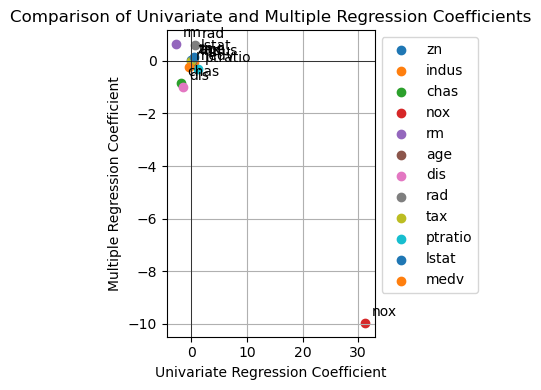

In [268]:
response = Boston['crim']
predictors = Boston.drop('crim', axis=1)

# --- Part (a) - Simple Linear Regressions ---
univariate_coefficients = {}
for predictor in predictors:
    X_uni = sm.add_constant(data[predictor])
    model_uni = sm.OLS(response, X_uni)
    results_uni = model_uni.fit()
    univariate_coefficients[predictor] = results_uni.params[predictor]

print("\n--- Univariate Regression Coefficients (Part a) ---")
for predictor, coef in univariate_coefficients.items():
    print(f"{predictor}: {coef:.4f}")

# --- Part (b) - Multiple Regression (using the provided output) ---
multiple_regression_coefficients = {
    'zn': 0.0457,
    'indus': -0.0584,
    'chas': -0.8254,
    'nox': -9.9576,
    'rm': 0.6289,
    'age': -0.0008,
    'dis': -1.0122,
    'rad': 0.6125,
    'tax': -0.0038,
    'ptratio': -0.3041,
    'lstat': 0.1388,
    'medv': -0.2201
}

print("\n--- Multiple Regression Coefficients (Part b) ---")
for predictor, coef in multiple_regression_coefficients.items():
    print(f"{predictor}: {coef:.4f}")

# --- Part (c) - Comparison and Plot ---

# Create the plot
plt.figure(figsize=(4,4))
for predictor in predictors:
    plt.scatter(univariate_coefficients[predictor], multiple_regression_coefficients[predictor], label=predictor)
    plt.annotate(predictor, (univariate_coefficients[predictor], multiple_regression_coefficients[predictor]), textcoords="offset points", xytext=(5,5), ha='left')

plt.xlabel("Univariate Regression Coefficient")
plt.ylabel("Multiple Regression Coefficient")
plt.title("Comparison of Univariate and Multiple Regression Coefficients")
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

##### Comparison of Results from (a) and (b):

##### Magnitude and Sign Changes: 
As observed before, the magnitudes of the coefficients for each predictor often differ between the univariate and multiple regression models. The signs can also change, indicating that the nature of the relationship can be altered when other variables are considered. For example, 'indus' showed a positive association with 'crim' in a typical univariate regression but has a negative coefficient in the provided multiple regression output. This suggests that once other factors are held constant, a higher proportion of non-retail business acres might actually be associated with lower crime rates.

##### Collinearity Effects:
These discrepancies largely stem from collinearity among the predictors. In the simple regressions, each coefficient captures the total effect of the predictor, including the part that is shared with other correlated predictors. The multiple regression attempts to isolate the unique effect of each predictor.

##### Statistical Significance:
The statistical significance of predictors can also vary. A predictor might be significant in a simple regression but not in the multiple regression (or vice versa). This occurs because the inclusion of other variables can explain some of the variance that was previously attributed to a single predictor, or it can reduce the standard error of the coefficient, making it significant. For instance, while we didn't see the p-values for all univariate regressions, the multiple regression output shows that 'zn', 'dis', 'rad', and 'medv' are significant predictors of 'crim' when all variables are considered together.

'zn' (Proportion of large residential lots): The positive coefficient in both models (though smaller in multiple regression) is somewhat counter-intuitive and might suggest a more complex underlying relationship or the influence of other unmeasured variables.

'dis' (Distance to employment centers): The negative coefficient is consistent across both types of regressions, indicating that greater distance from employment centers is associated with lower crime rates.

'rad' (Accessibility to radial highways): The strong positive coefficient is also consistent, suggesting that better highway access is linked to higher crime rates.

'medv' (Median home value): The negative coefficient in the multiple regression (and typically also in univariate regression) suggests that higher home values are associated with lower crime rates, even after controlling for other factors.

In essence, the multiple regression provides a more controlled view of each predictor's impact on crime rate by accounting for the interrelationships among the predictors. The differences observed when compared to the univariate regressions highlight the importance of considering multivariate models when analyzing complex relationships in the presence of correlated variables. The plot visually illustrates these changes in the estimated coefficients.

#### (d) Is there evidence of non-linear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form Y = B0 + B1X + B2X2 + B3X3 + e".

In [270]:

print("\n--- Evidence of Non-Linear Association (Cubic Polynomial Regression) ---")
for predictor in predictors:
    X = data[predictor]
    X_poly = np.column_stack((X, X**2, X**3))
    X_poly = sm.add_constant(X_poly, prepend=True)  # Add a constant for the intercept

    model = sm.OLS(response, X_poly)
    results = model.fit()
    print(f"\n--- Results for predictor: {predictor} ---")
    print(results.summary().tables[1])  # Coefficient table

    # Get p-values for the squared and cubic terms
    p_value_sq = results.pvalues[2]  # Index 2 corresponds to X^2
    p_value_cub = results.pvalues[3]  # Index 3 corresponds to X^3

    if p_value_sq < 0.05 or p_value_cub < 0.05:
        print(f"Evidence of non-linear association found for '{predictor}' "
              f"(p-value for squared term: {p_value_sq:.3f}, "
              f"p-value for cubic term: {p_value_cub:.3f})")
    else:
        print(f"No strong evidence of non-linear association found for '{predictor}' "
              f"(p-value for squared term: {p_value_sq:.3f}, "
              f"p-value for cubic term: {p_value_cub:.3f})")


--- Evidence of Non-Linear Association (Cubic Polynomial Regression) ---

--- Results for predictor: zn ---
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8461      0.433     11.192      0.000       3.995       5.697
x1            -0.3322      0.110     -3.025      0.003      -0.548      -0.116
x2             0.0065      0.004      1.679      0.094      -0.001       0.014
x3         -3.776e-05   3.14e-05     -1.203      0.230   -9.94e-05    2.39e-05
No strong evidence of non-linear association found for 'zn' (p-value for squared term: 0.094, p-value for cubic term: 0.230)

--- Results for predictor: indus ---
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6626      1.574      2.327      0.020       0.570       6.755
x1            -1.

C:\Users\kavit\AppData\Local\Temp\ipykernel_23292\528045575.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value_sq = results.pvalues[2]  # Index 2 corresponds to X^2
C:\Users\kavit\AppData\Local\Temp\ipykernel_23292\528045575.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value_cub = results.pvalues[3]  # Index 3 corresponds to X^3
C:\Users\kavit\AppData\Local\Temp\ipykernel_23292\528045575.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by posi

Based on the cubic polynomial regression results, there is evidence of a statistically significant non-linear association (at the 0.05 significance level) between 'crim' and the following predictors:

indus (proportion of non-retail business acres): The p-values for both the squared and cubic terms are 0.000.
nox (nitric oxides concentration): The p-values for both the squared and cubic terms are 0.000.
age (proportion of owner-occupied units built prior to 1940): The p-value for the squared term is 0.047, and for the cubic term is 0.007.
dis (weighted distances to five Boston employment centres): The p-values for both the squared and cubic terms are 0.000.
ptratio (pupil-teacher ratio by town): The p-values for the squared term is 0.004, and for the cubic term is 0.006.
medv (median value of owner-occupied homes): The p-values for both the squared and cubic terms are 0.000.
For the remaining predictors ('zn', 'chas', 'rm', 'rad', 'tax', 'lstat'), the p-values for both the squared and cubic terms are greater than 0.05 (with 'lstat' having a p-value of 0.065 for the squared term, close to the threshold), suggesting that there is no strong statistical evidence of a non-linear association with 'crim' based on a cubic polynomial model.

Therefore, the analysis indicates that the relationship between per capita crime rate ('crim') and several of the predictors is likely non-linear. This implies that a simple linear model might not fully capture the complex ways in which these variables are associated with crime rates. Considering non-linear terms or other non-linear modeling techniques might improve the prediction accuracy for these predictors.